In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline

Update end date below to the previous day's date

In [2]:
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m/%d/%Y')

'09/15/2021'

In [3]:
x = pd.date_range(start='4/12/2020', end=yesterday)
#x = pd.date_range(start='7/12/2021', end='9/08/2021')

In [4]:
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

In [5]:
df_jhu_us_dict= {}
for y in range(len(date_list)):
    url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/' + date_list[y] + r'.csv'
    df_jhu_us_dict[date_list[y]] = pd.read_csv(url_value,header=0)
    df_jhu_us_dict[date_list[y]]['dt_date'] = dt_date_list[y]
  #  df_jhu_us_dict[date_list[y]].set_index(['Province_State'],  inplace=True)
    print(date_list[y])

04-12-2020
04-13-2020
04-14-2020
04-15-2020
04-16-2020
04-17-2020
04-18-2020
04-19-2020
04-20-2020
04-21-2020
04-22-2020
04-23-2020
04-24-2020
04-25-2020
04-26-2020
04-27-2020
04-28-2020
04-29-2020
04-30-2020
05-01-2020
05-02-2020
05-03-2020
05-04-2020
05-05-2020
05-06-2020
05-07-2020
05-08-2020
05-09-2020
05-10-2020
05-11-2020
05-12-2020
05-13-2020
05-14-2020
05-15-2020
05-16-2020
05-17-2020
05-18-2020
05-19-2020
05-20-2020
05-21-2020
05-22-2020
05-23-2020
05-24-2020
05-25-2020
05-26-2020
05-27-2020
05-28-2020
05-29-2020
05-30-2020
05-31-2020
06-01-2020
06-02-2020
06-03-2020
06-04-2020
06-05-2020
06-06-2020
06-07-2020
06-08-2020
06-09-2020
06-10-2020
06-11-2020
06-12-2020
06-13-2020
06-14-2020
06-15-2020
06-16-2020
06-17-2020
06-18-2020
06-19-2020
06-20-2020
06-21-2020
06-22-2020
06-23-2020
06-24-2020
06-25-2020
06-26-2020
06-27-2020
06-28-2020
06-29-2020
06-30-2020
07-01-2020
07-02-2020
07-03-2020
07-04-2020
07-05-2020
07-06-2020
07-07-2020
07-08-2020
07-09-2020
07-10-2020
07-11-2020

In [6]:
list(df_jhu_us_dict.keys())[0]

'04-12-2020'

In [7]:
State_list =list(df_jhu_us_dict[list(df_jhu_us_dict.keys())[0]].Province_State)

In [8]:
State_list.remove('Recovered')

In [9]:
State_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Diamond Princess',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Grand Princess',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'American Samoa',
 'Northern Mariana Islands',
 'Virgin Islands']

In [10]:
def process_state_deaths(passed_state):
    print(passed_state)
    aaa = df_jhu_us_dict[date_list[0]].loc[df_jhu_us_dict[date_list[0]].Province_State == passed_state]
#    print(aaa)
    for d_value in date_list[1:]:
        aaa = aaa.append(df_jhu_us_dict[d_value].loc[df_jhu_us_dict[d_value].Province_State == passed_state])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Deaths']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    return(ddd,passed_state)

In [11]:
def chart_daily_deaths(passed_df, passed_state_name):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ' + passed_state_name + ' Daily COVID Deaths')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Cases',color='black')
    plt.bar(passed_df.index,passed_df.Deaths)
    fig.savefig('JHUDaily '+ passed_state_name + ' Deaths.png')
plt.close()

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Diamond Princess
District of Columbia
Florida
Georgia
Grand Princess
Guam
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky


<ipython-input-11-579d1bc4f164>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Puerto Rico
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming
American Samoa
Northern Mariana Islands
Virgin Islands


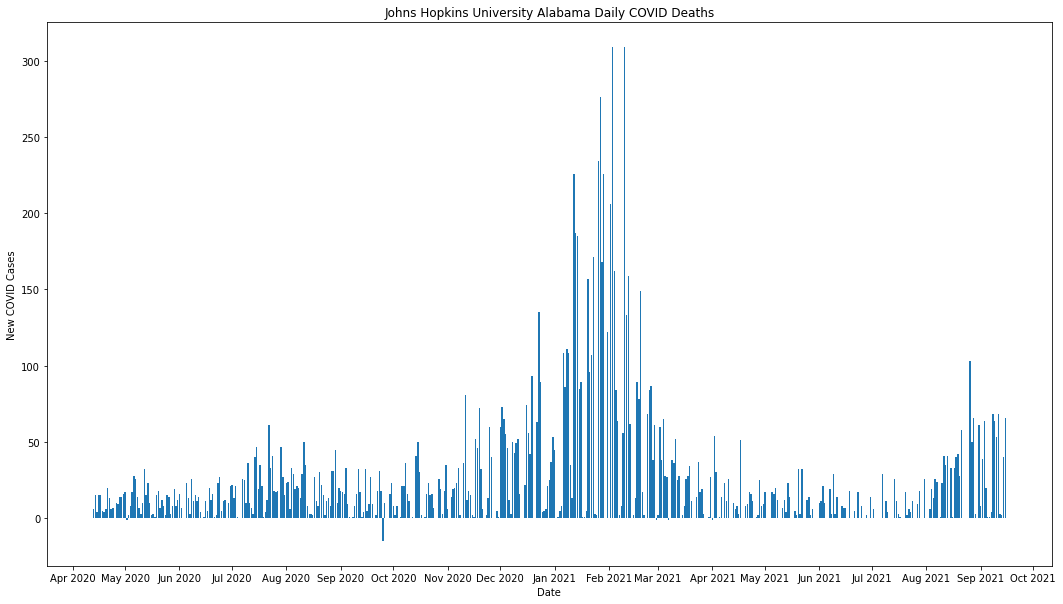

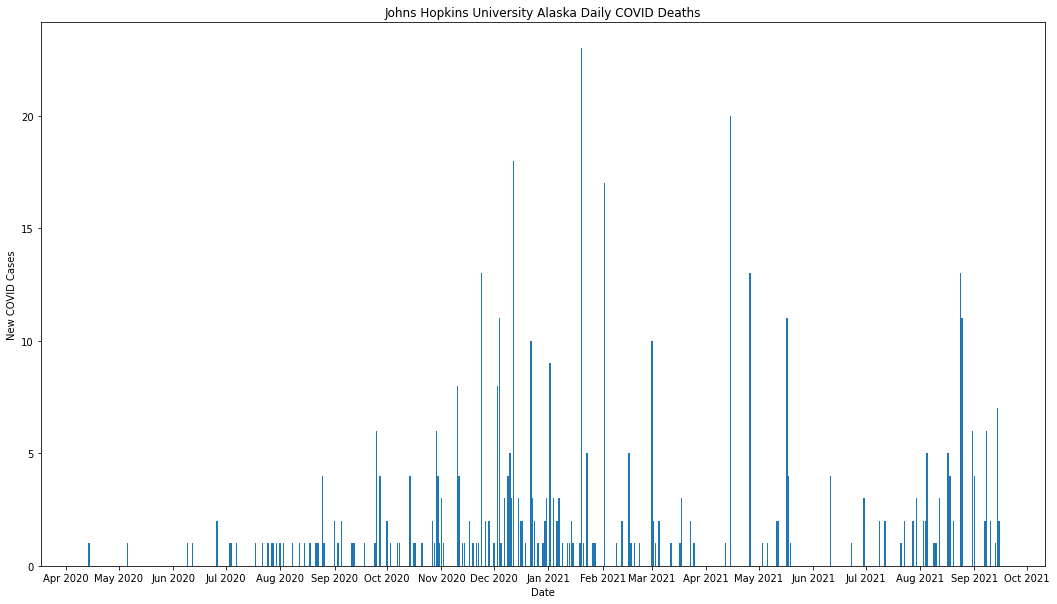

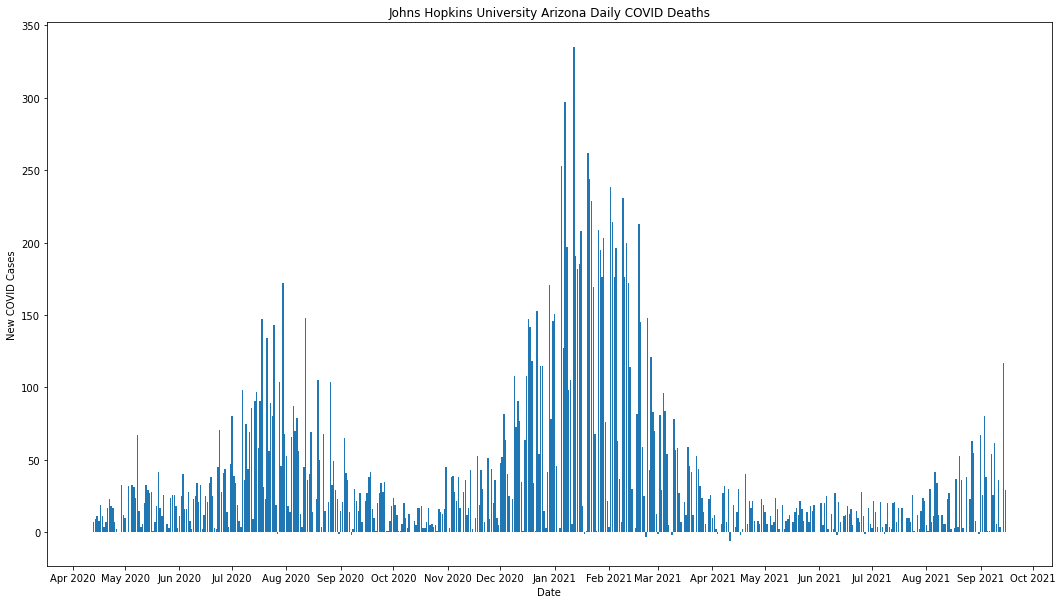

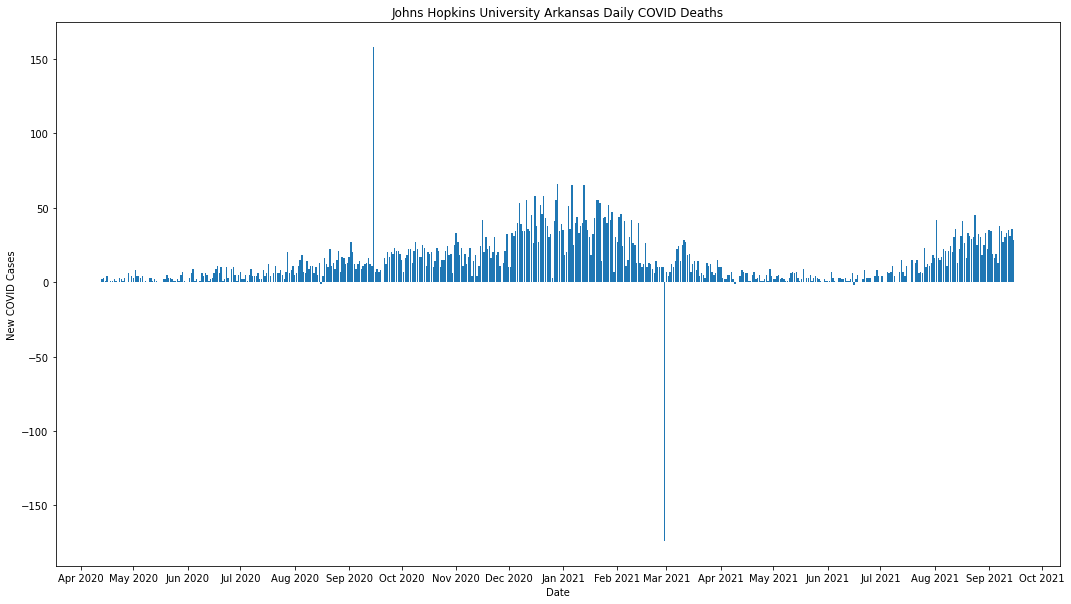

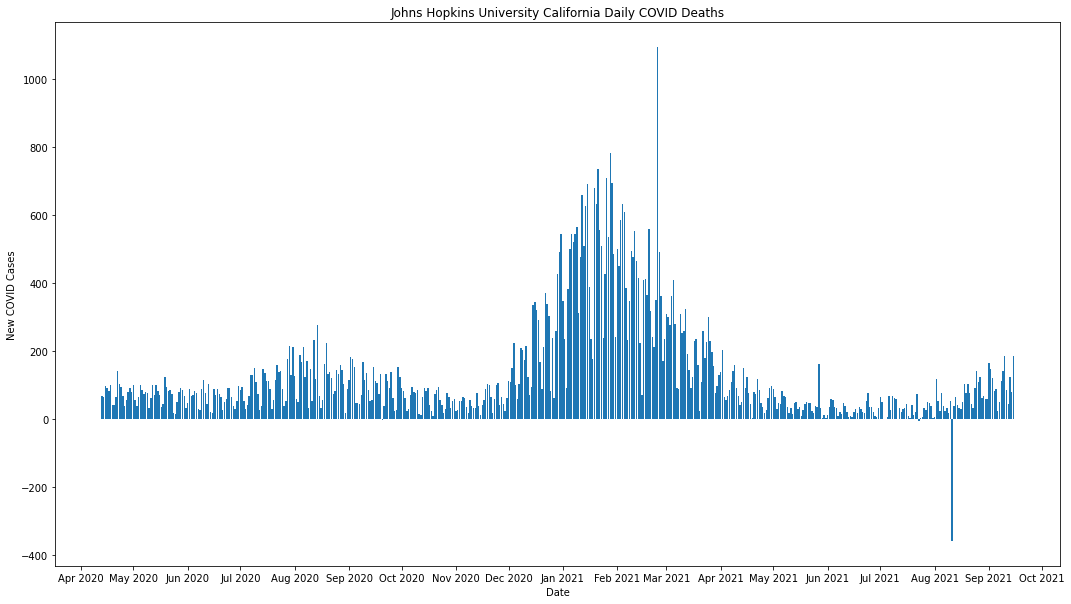

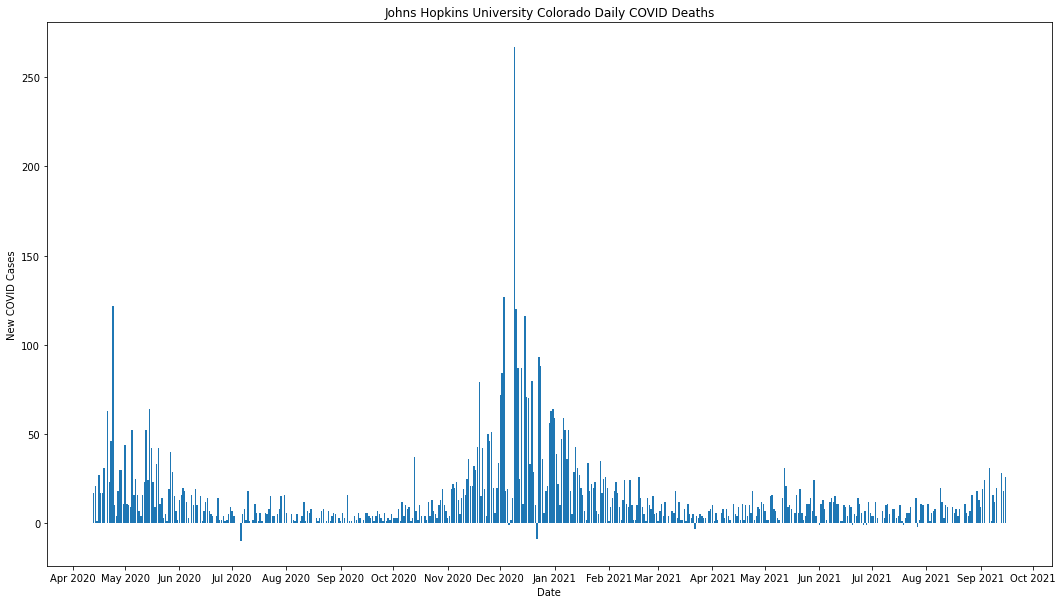

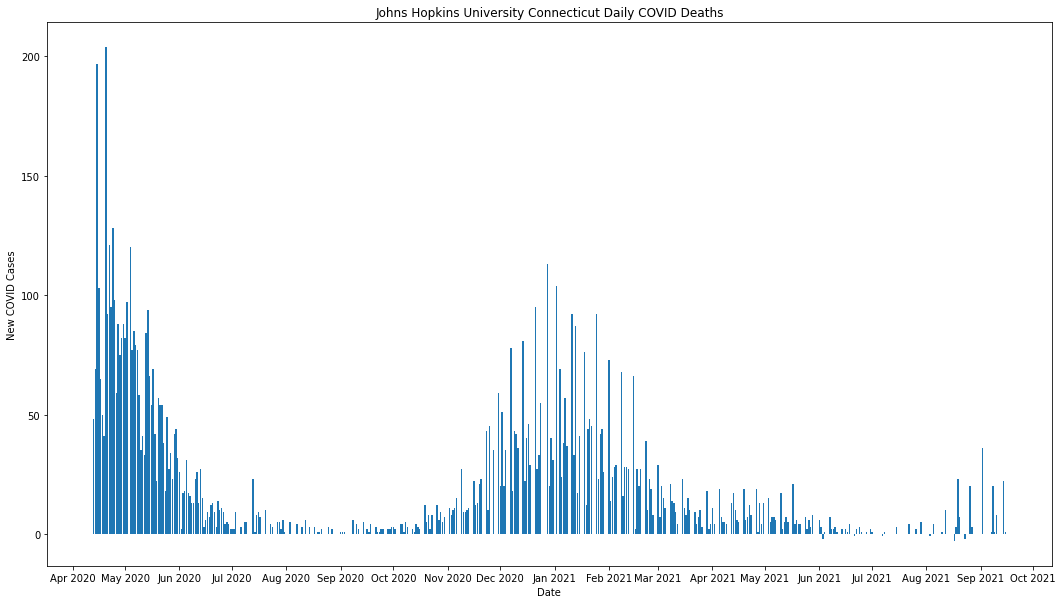

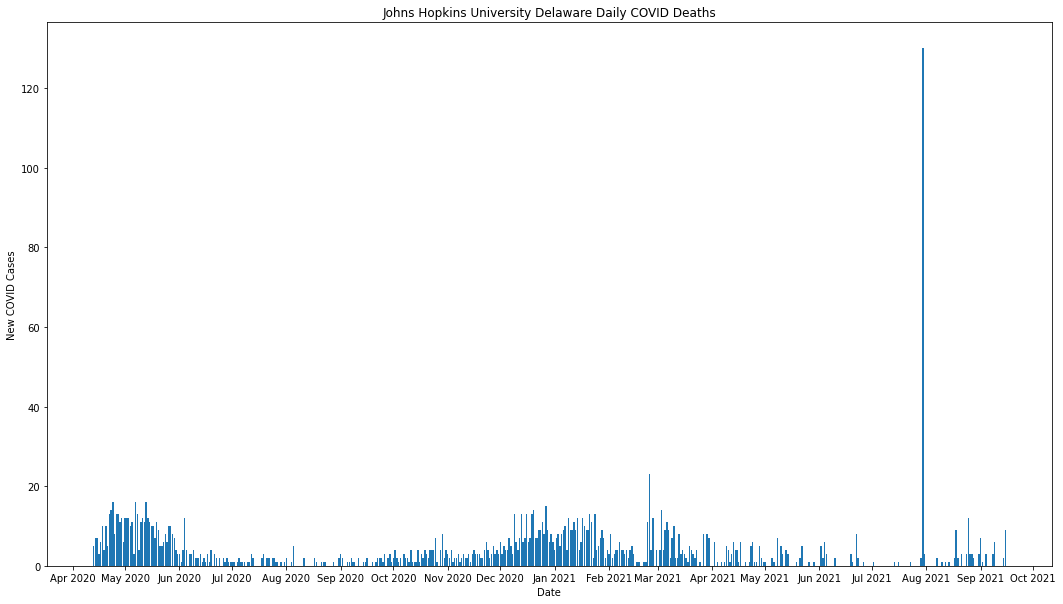

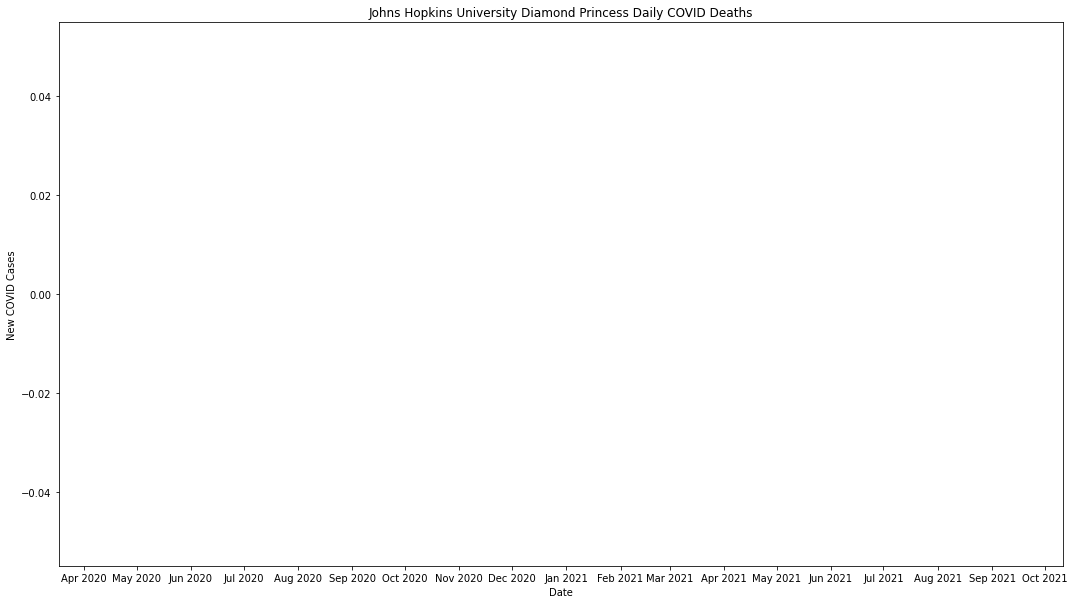

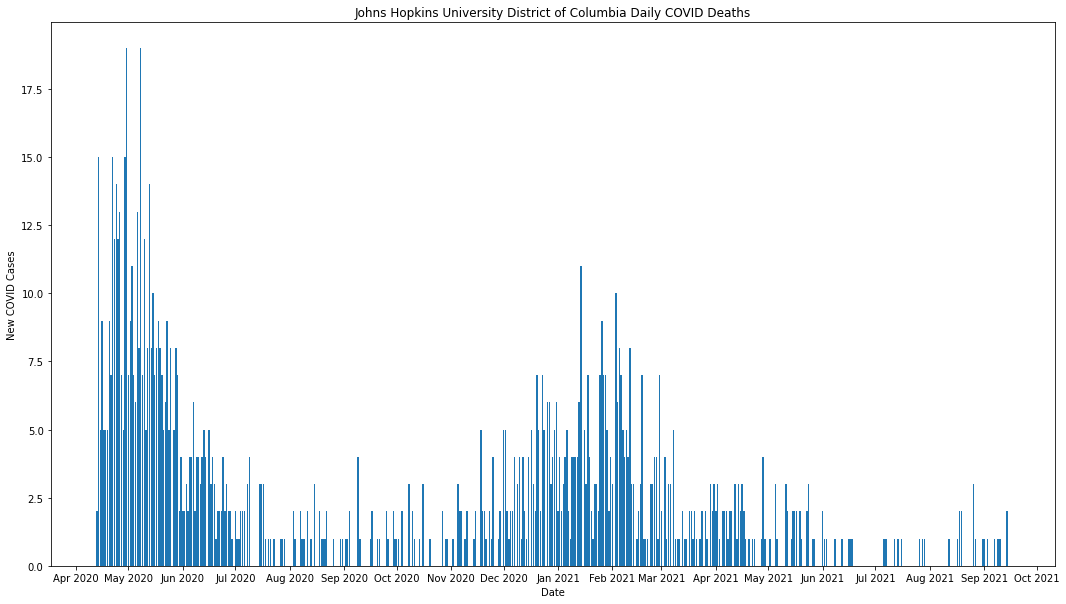

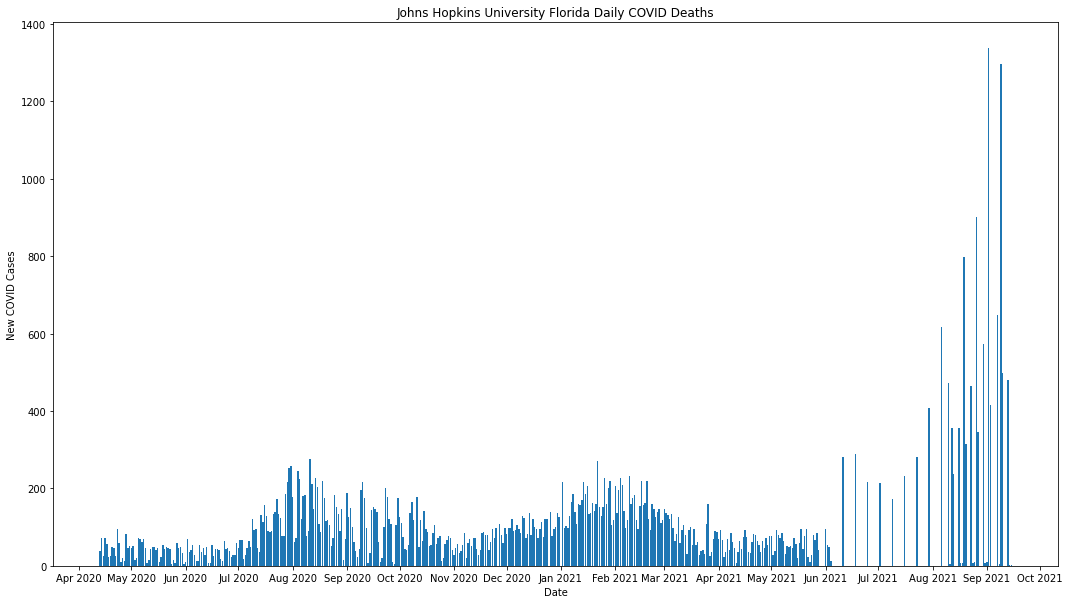

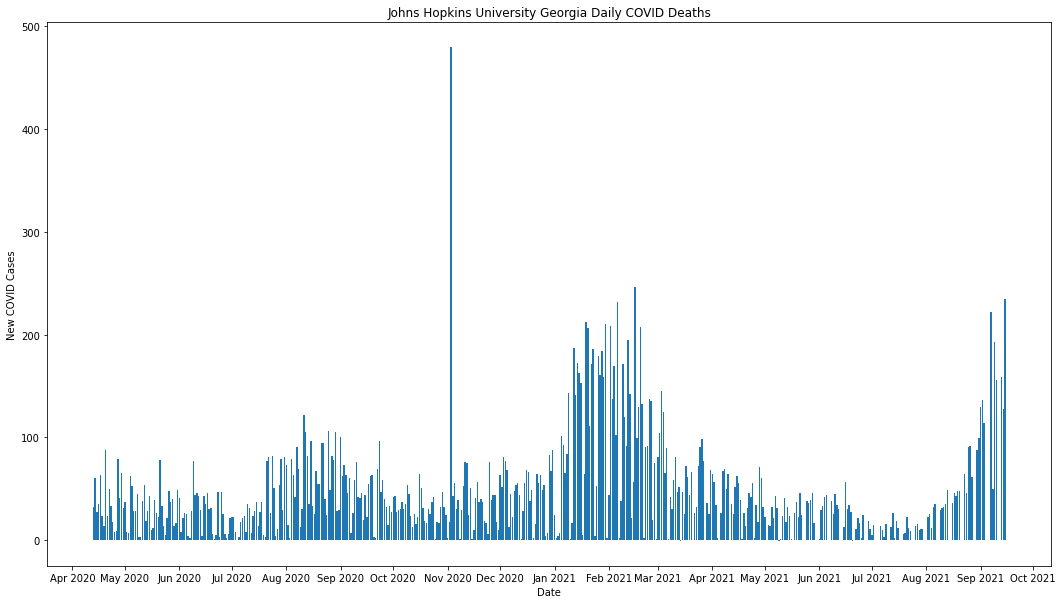

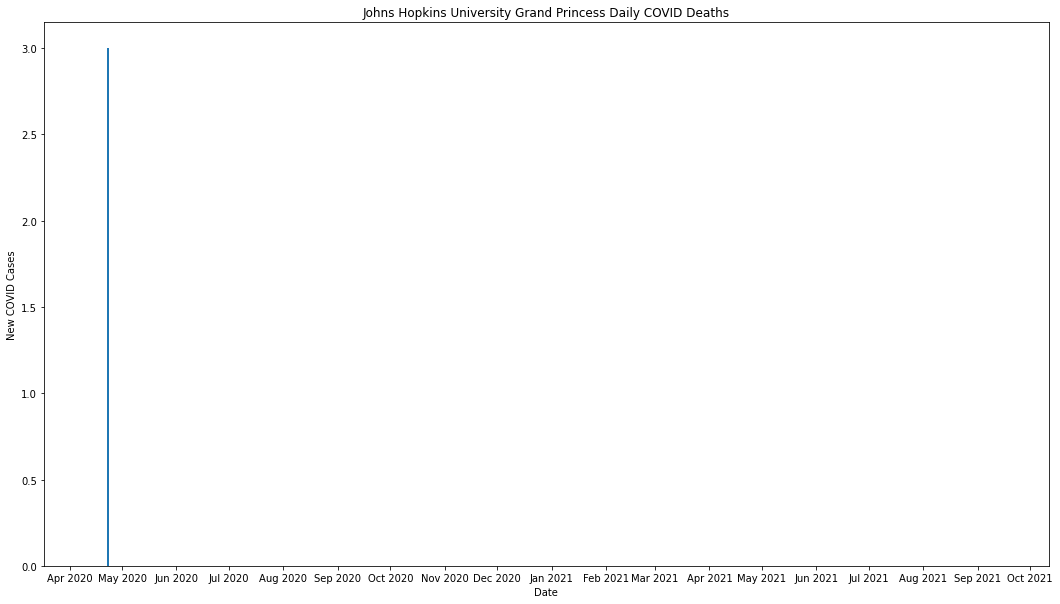

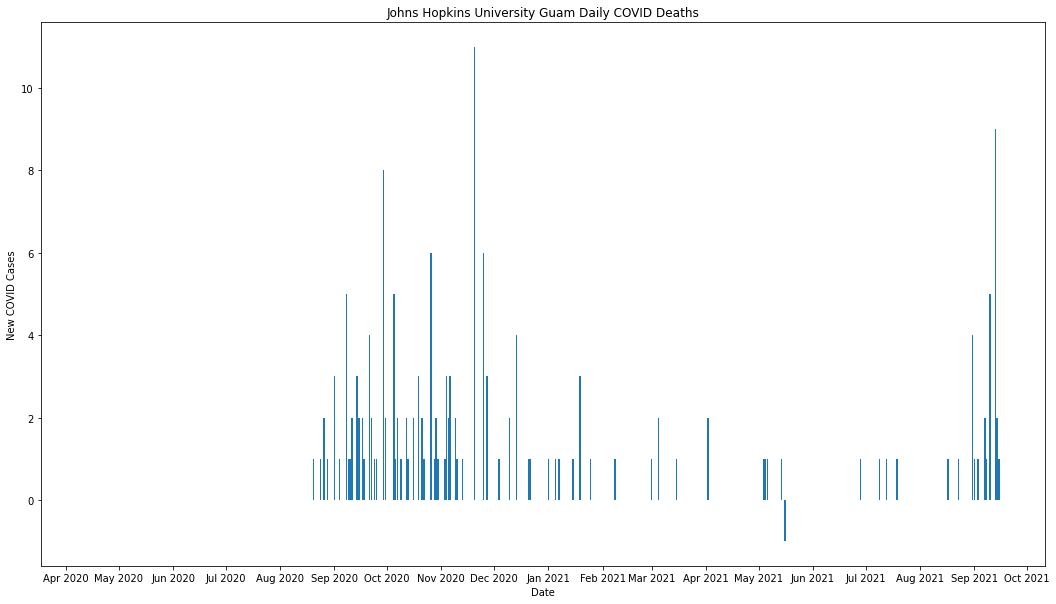

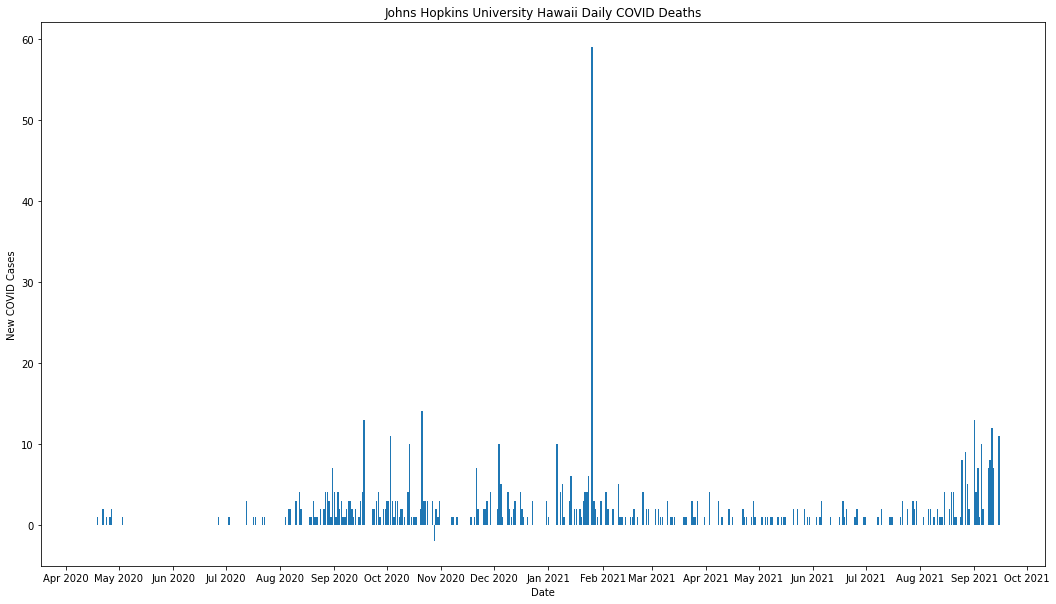

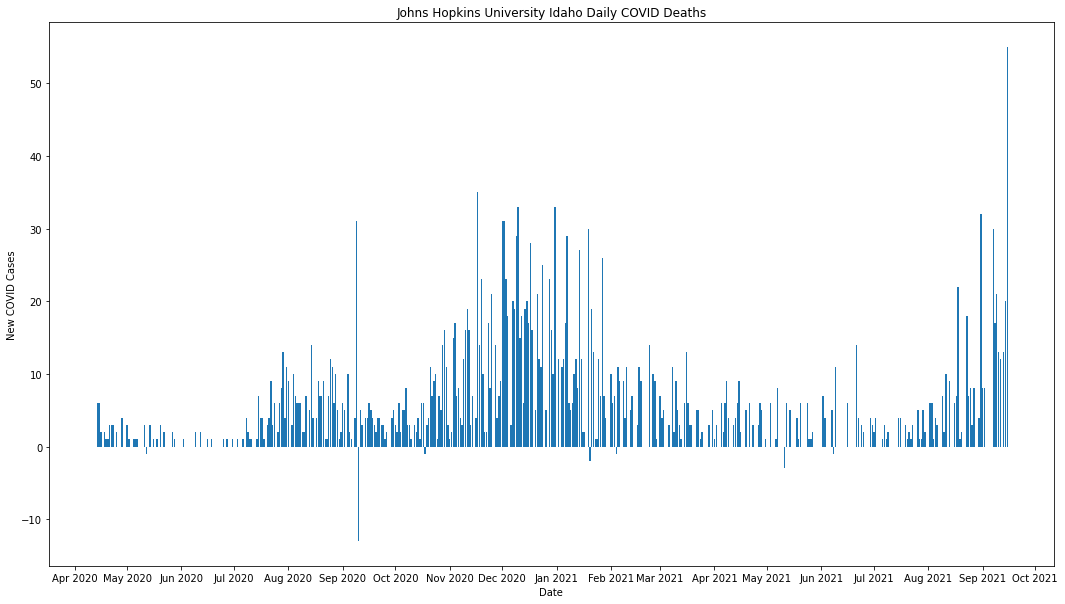

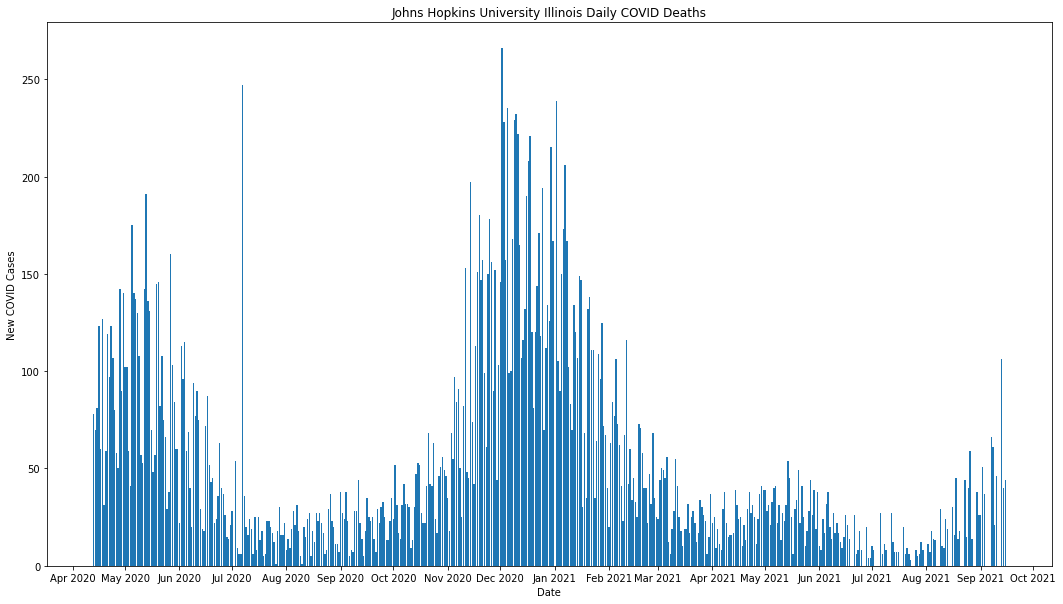

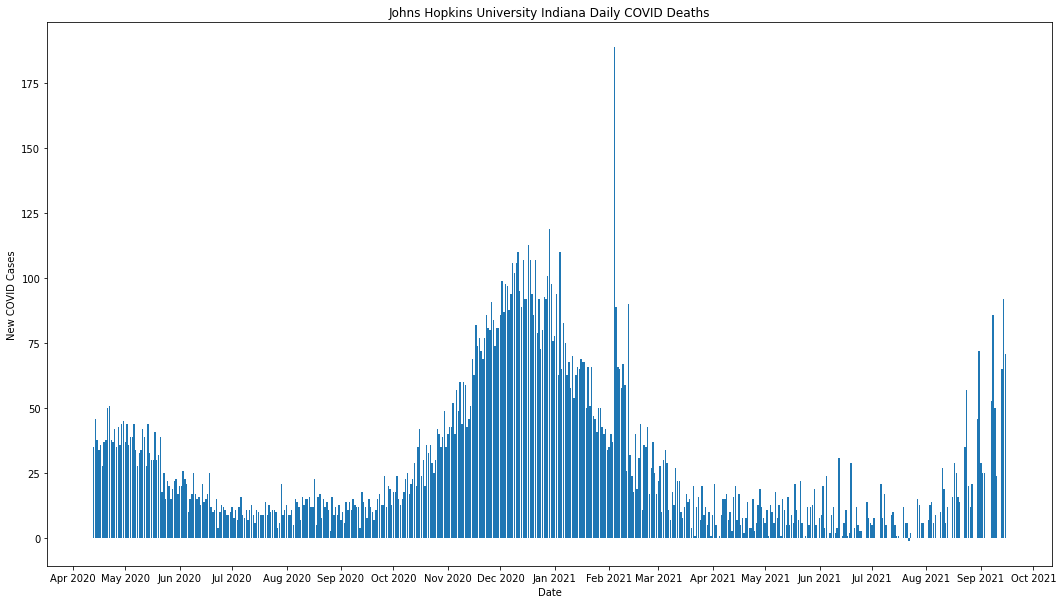

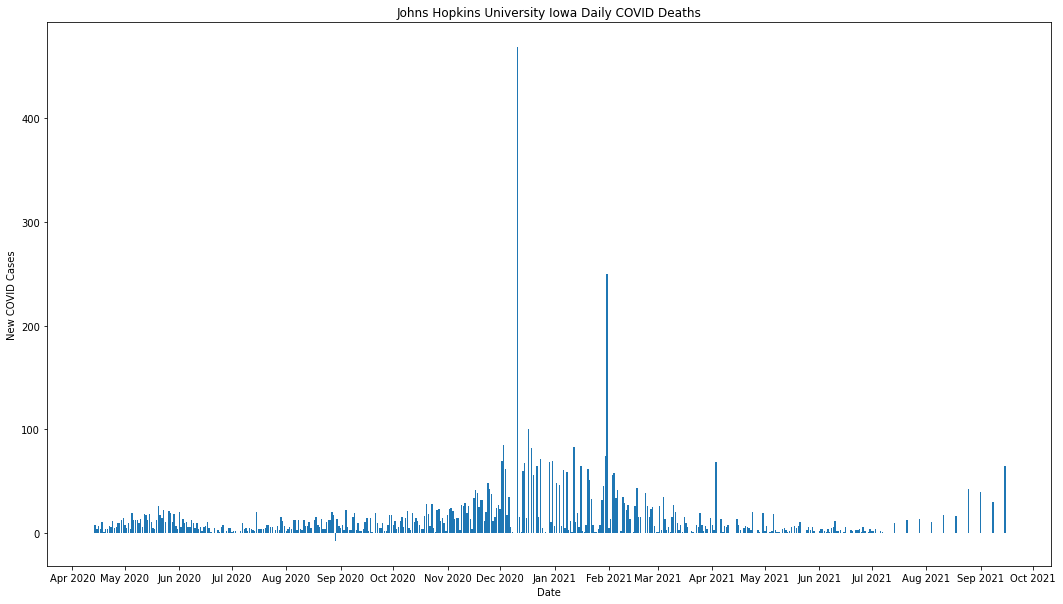

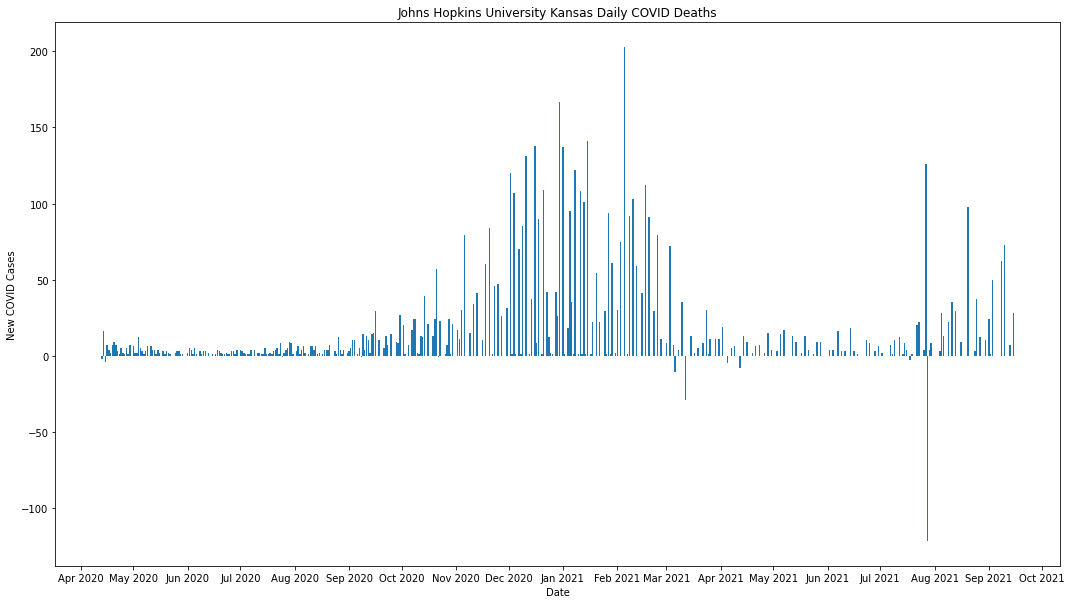

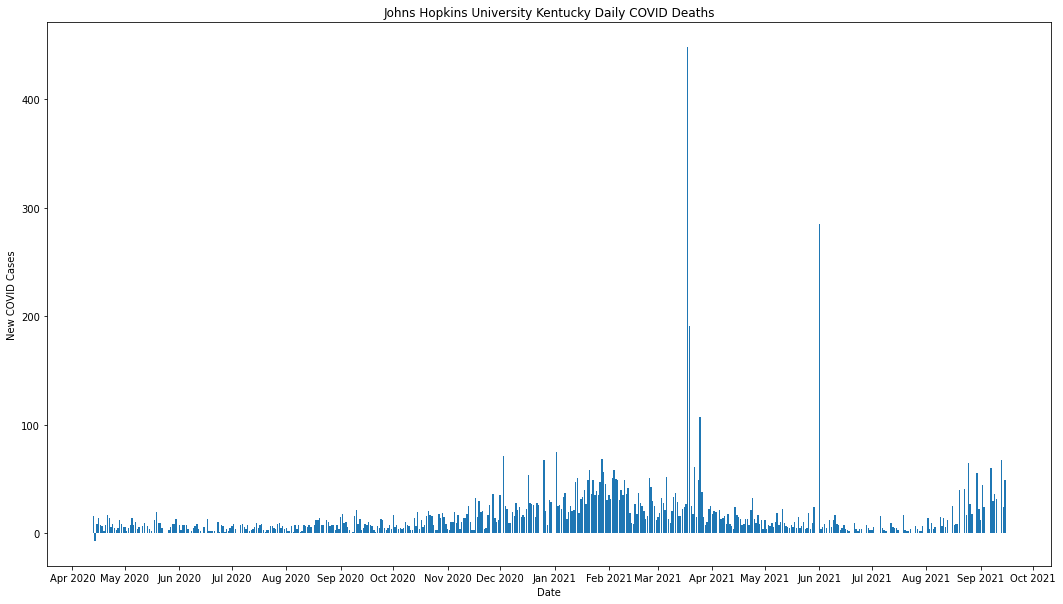

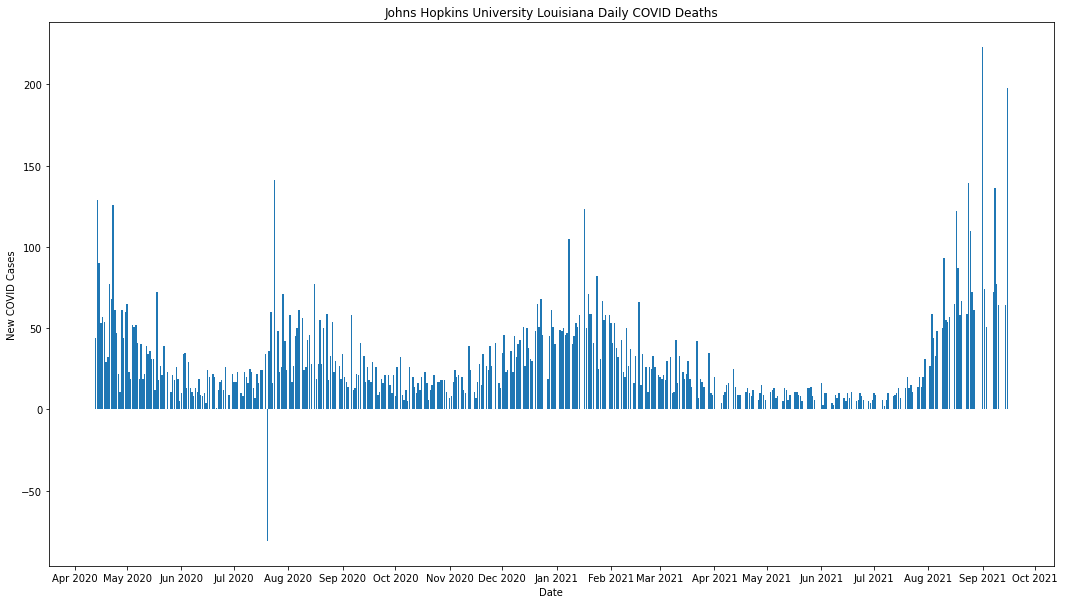

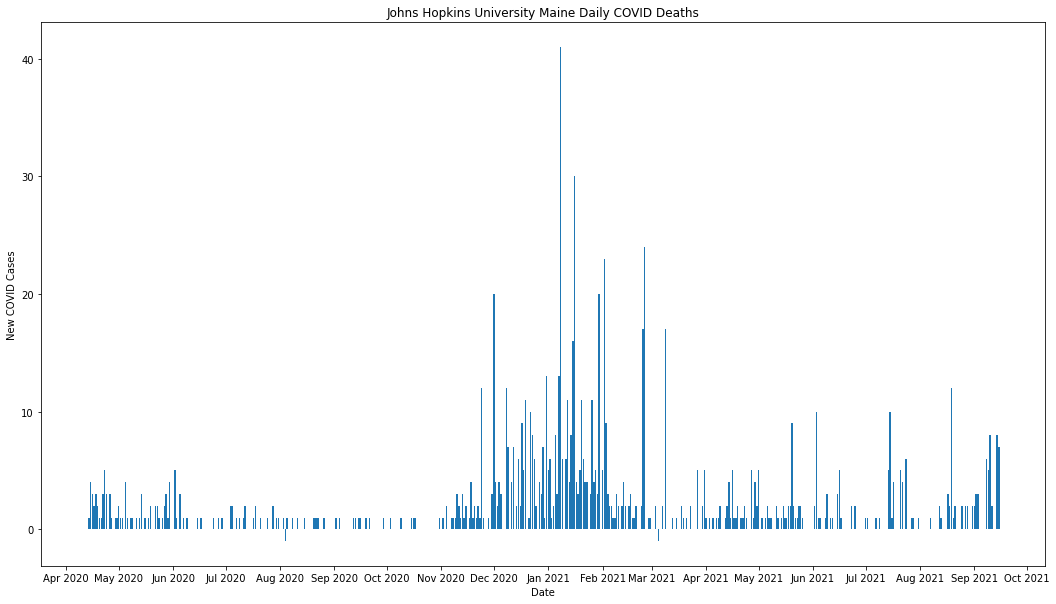

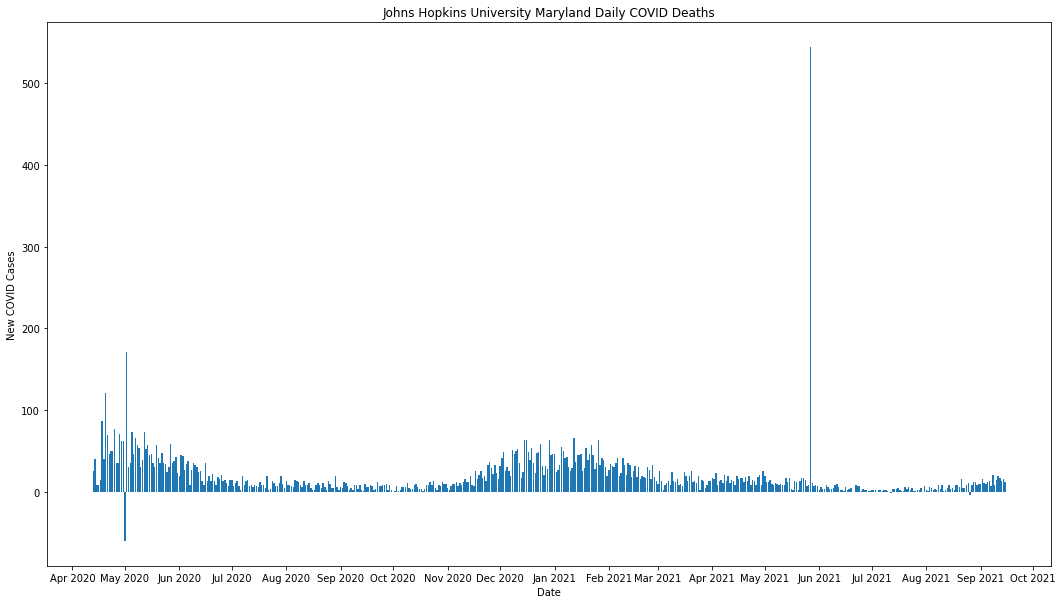

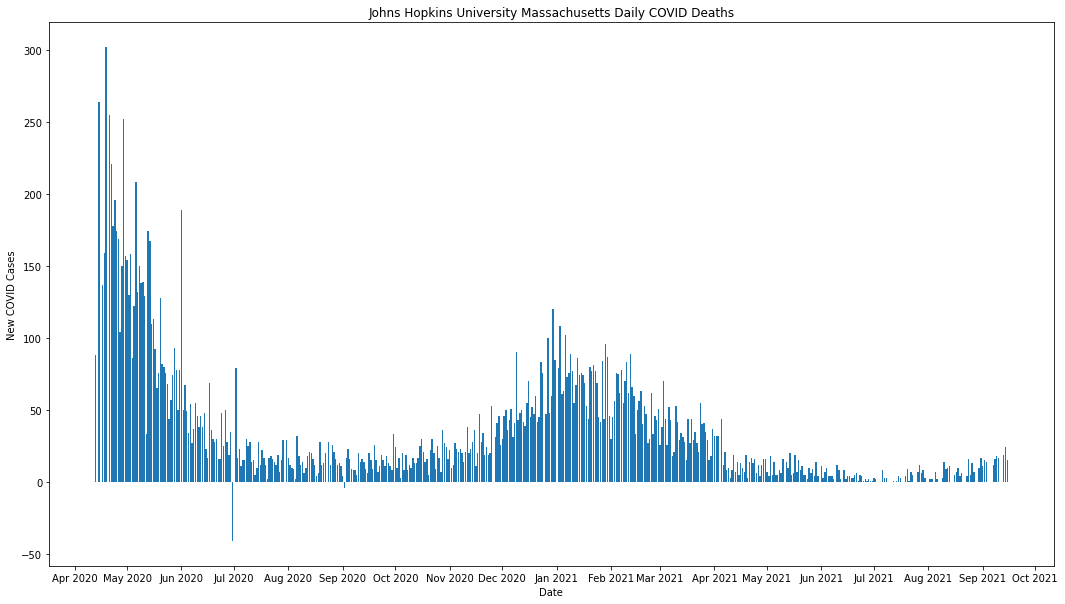

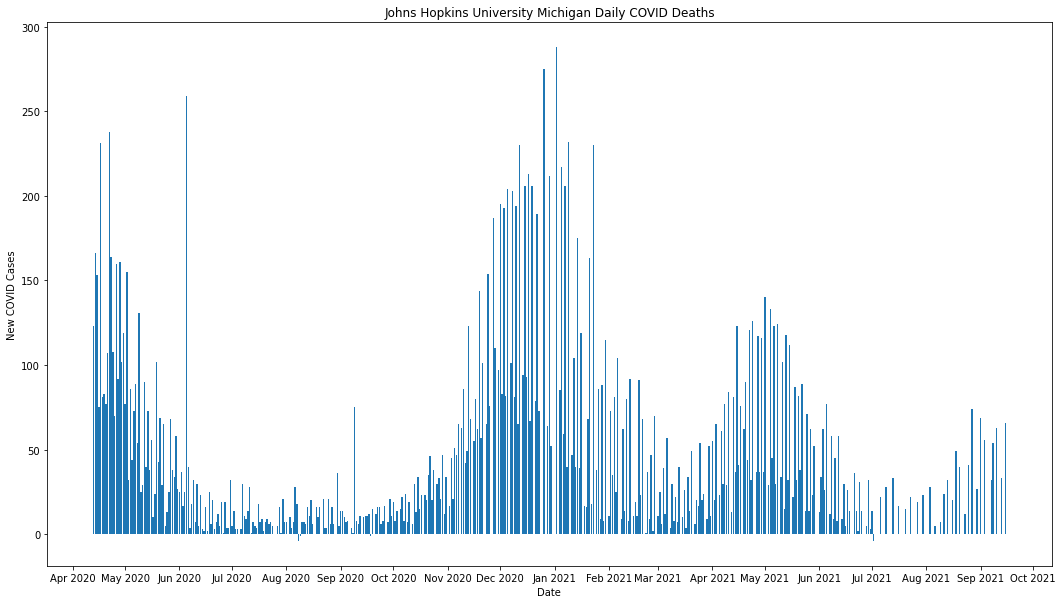

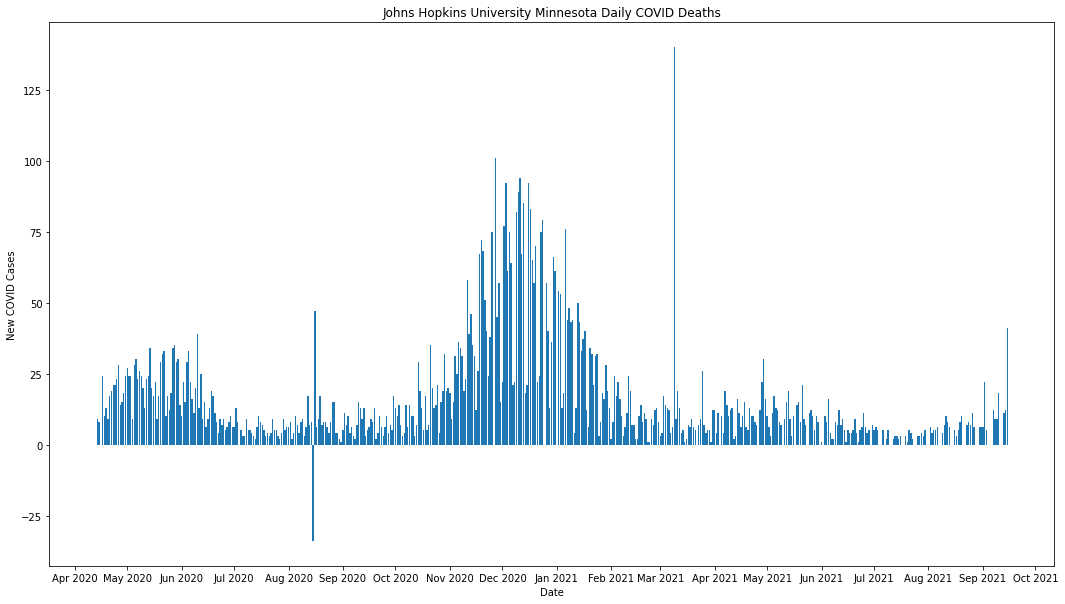

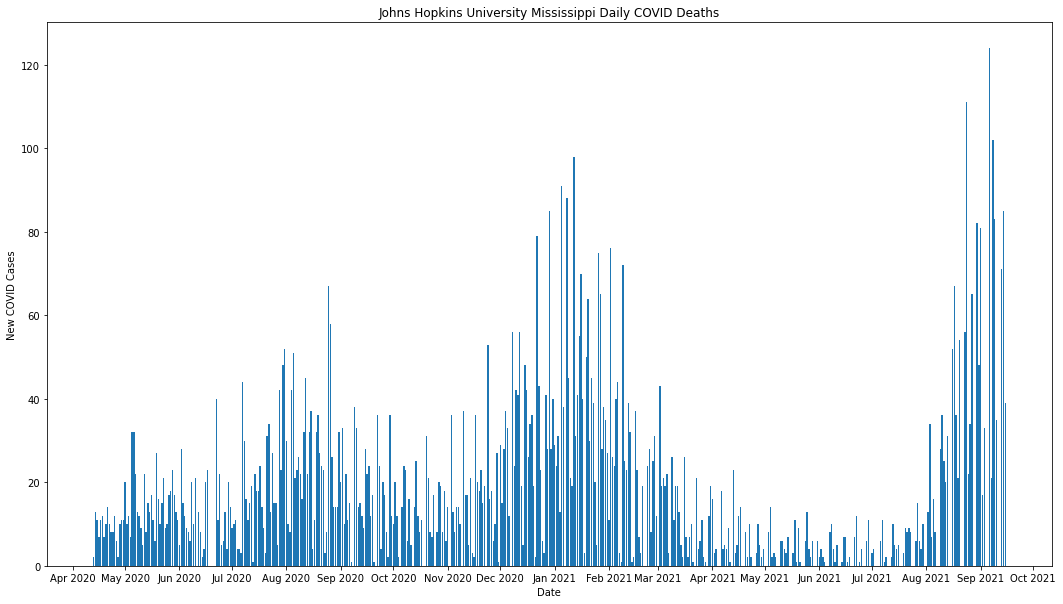

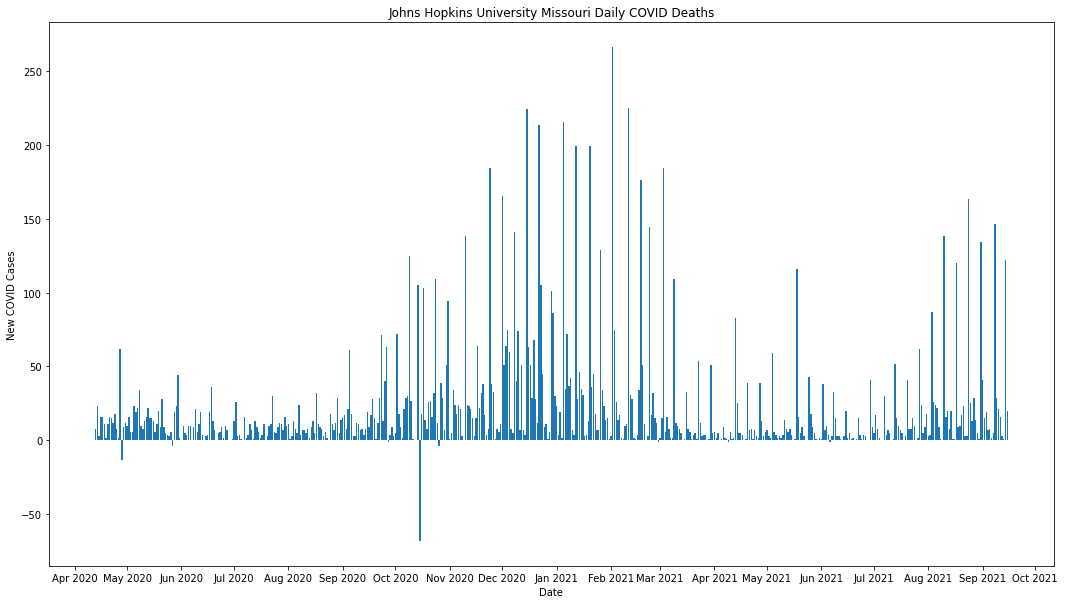

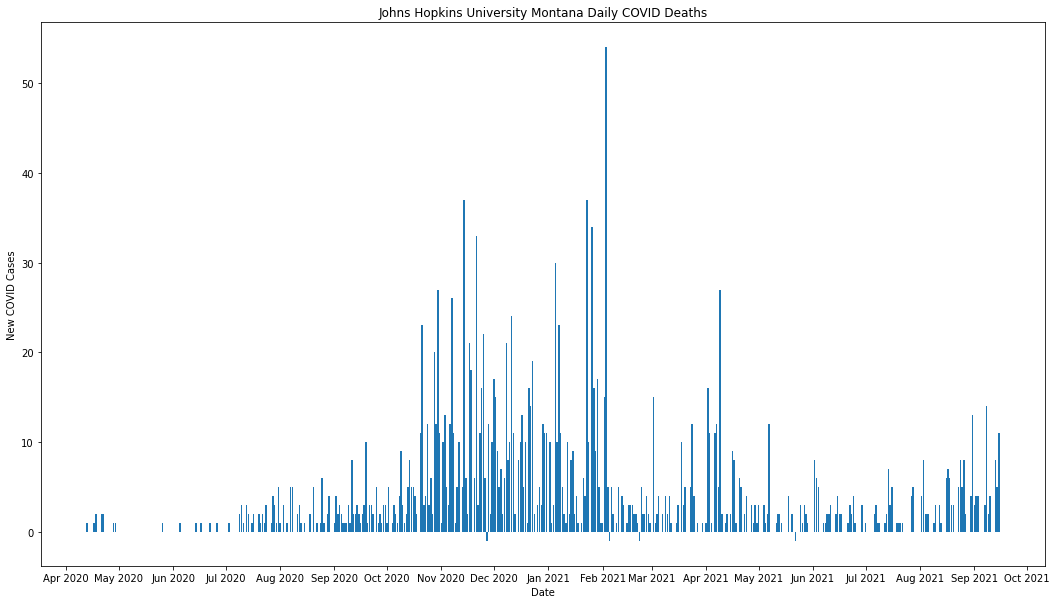

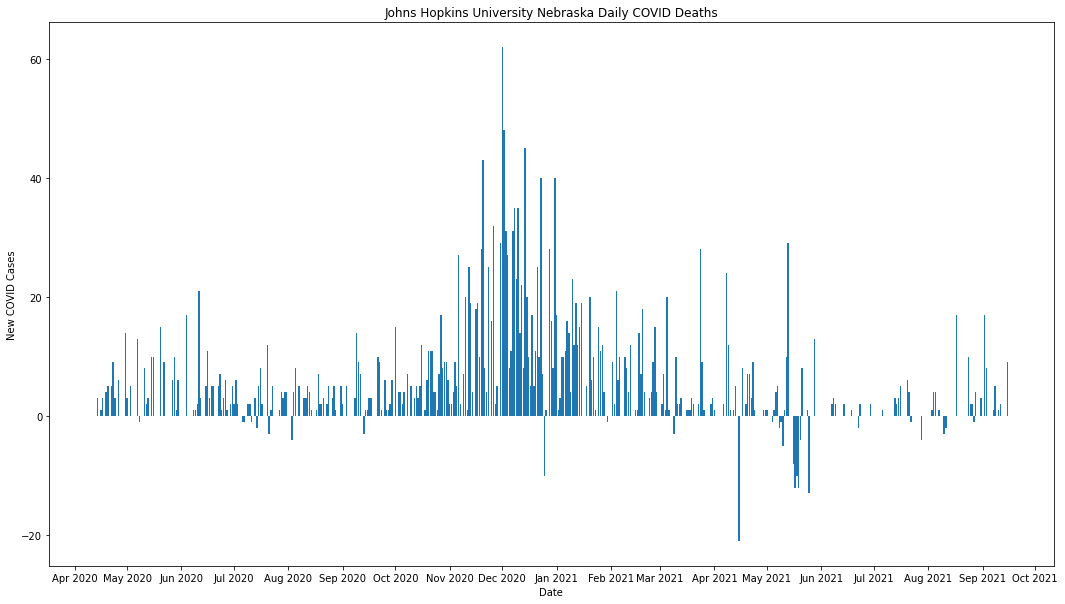

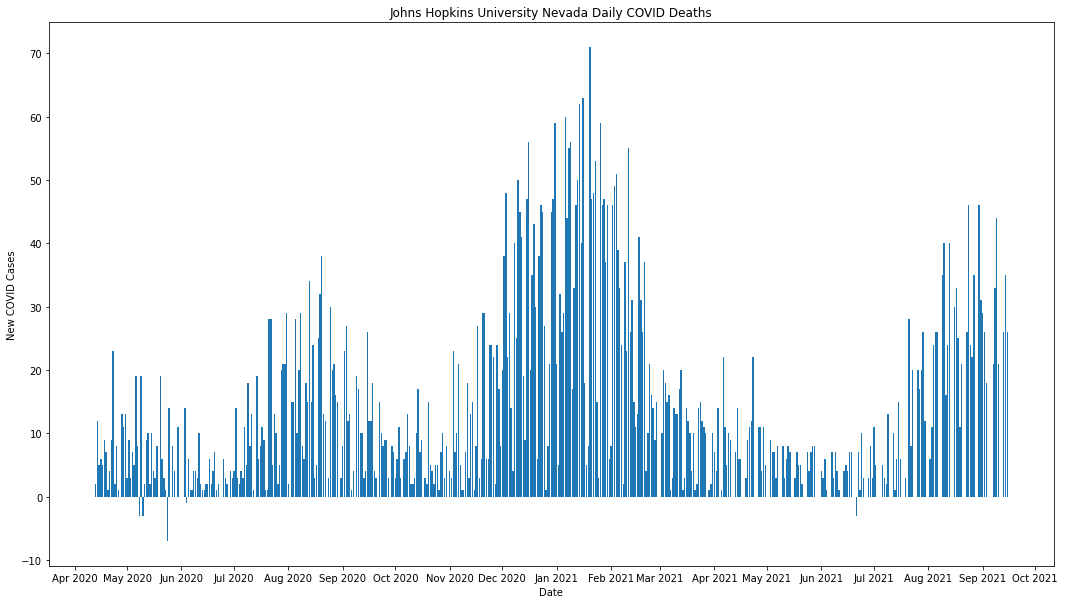

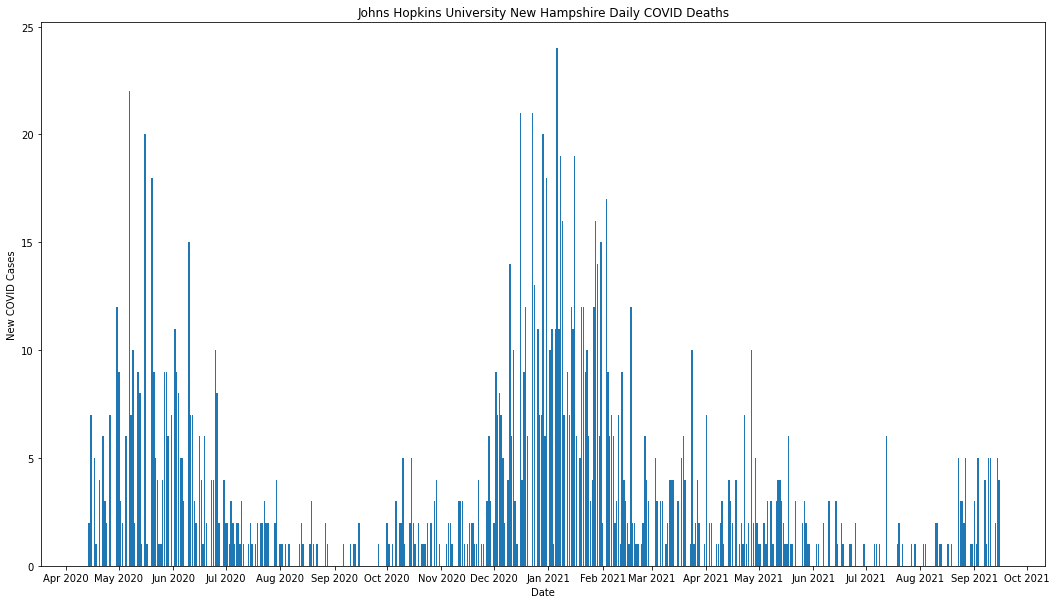

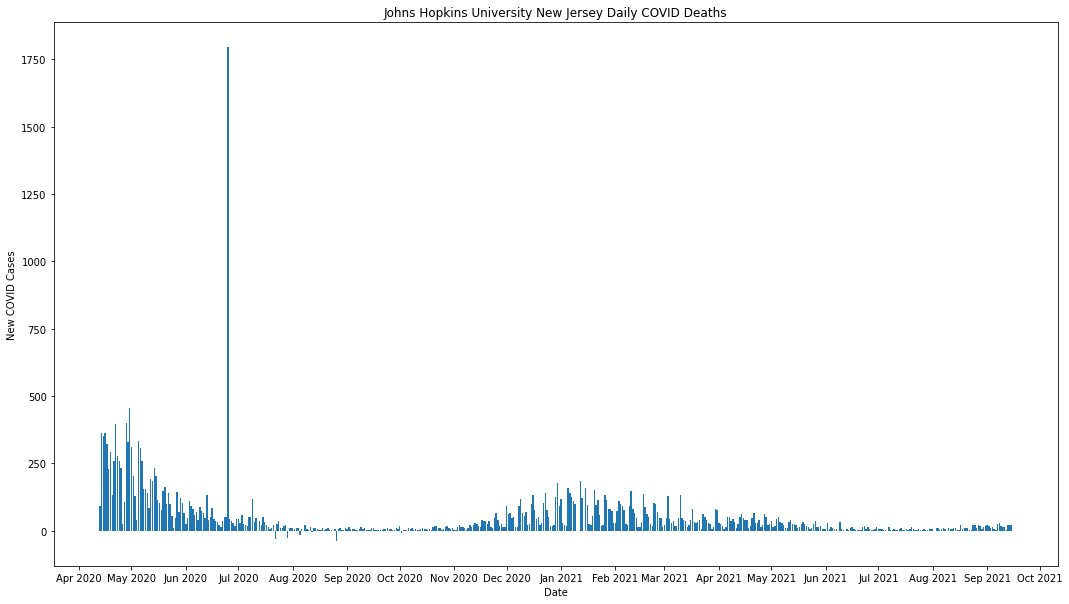

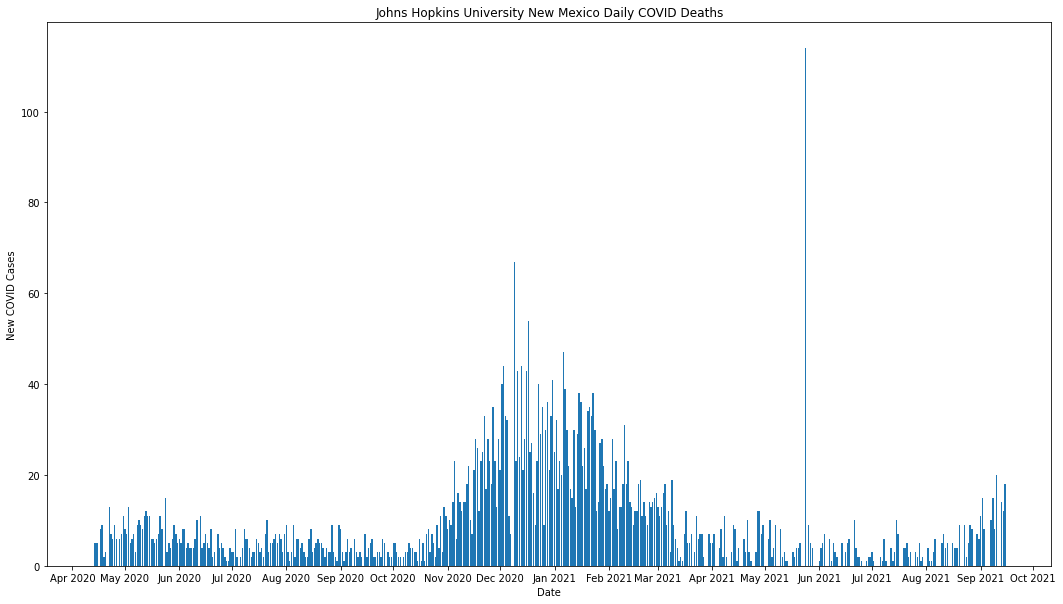

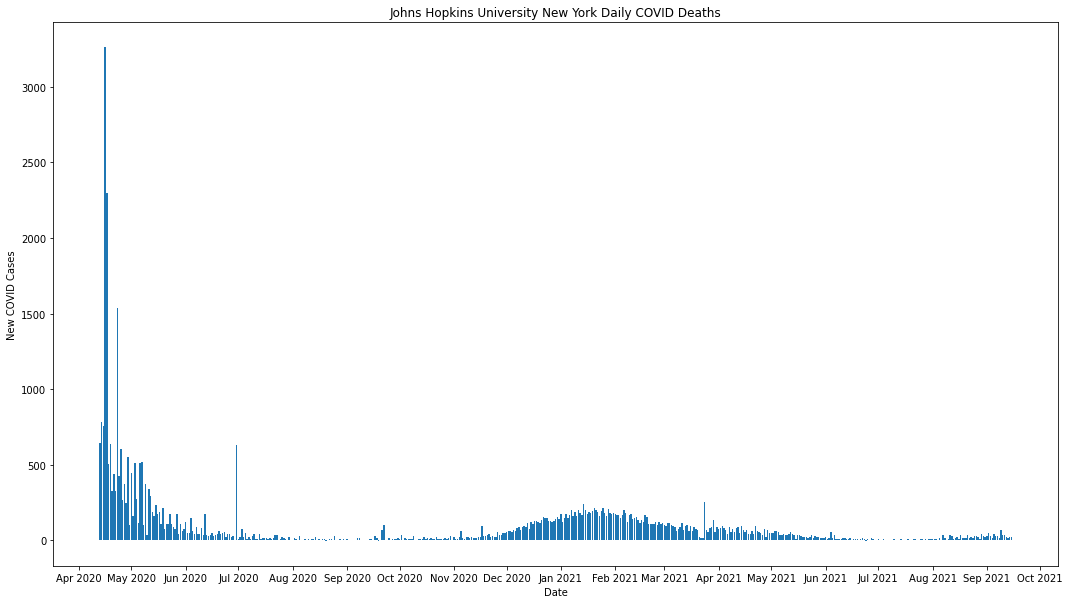

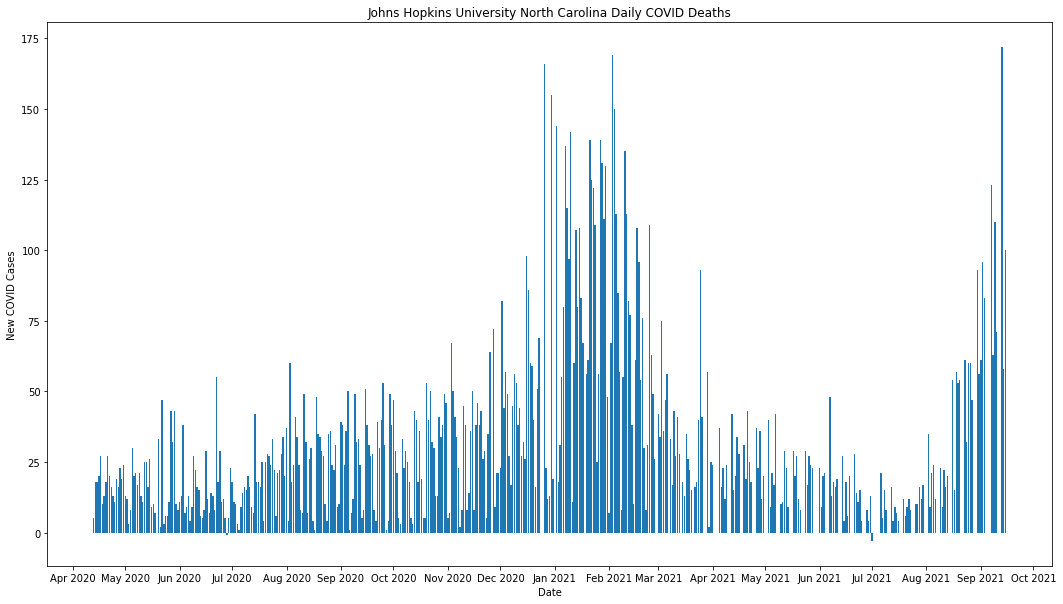

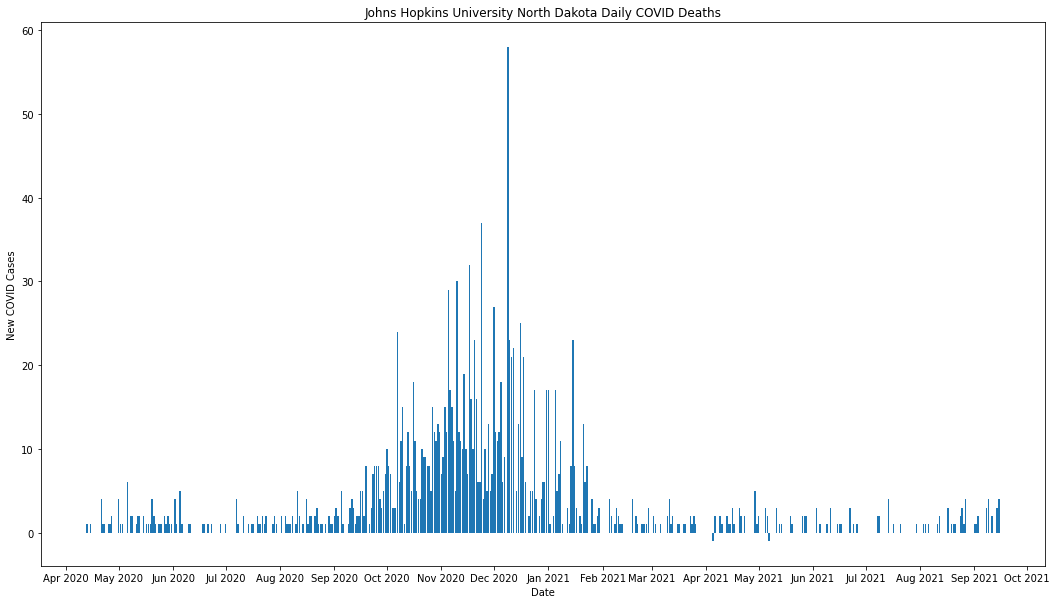

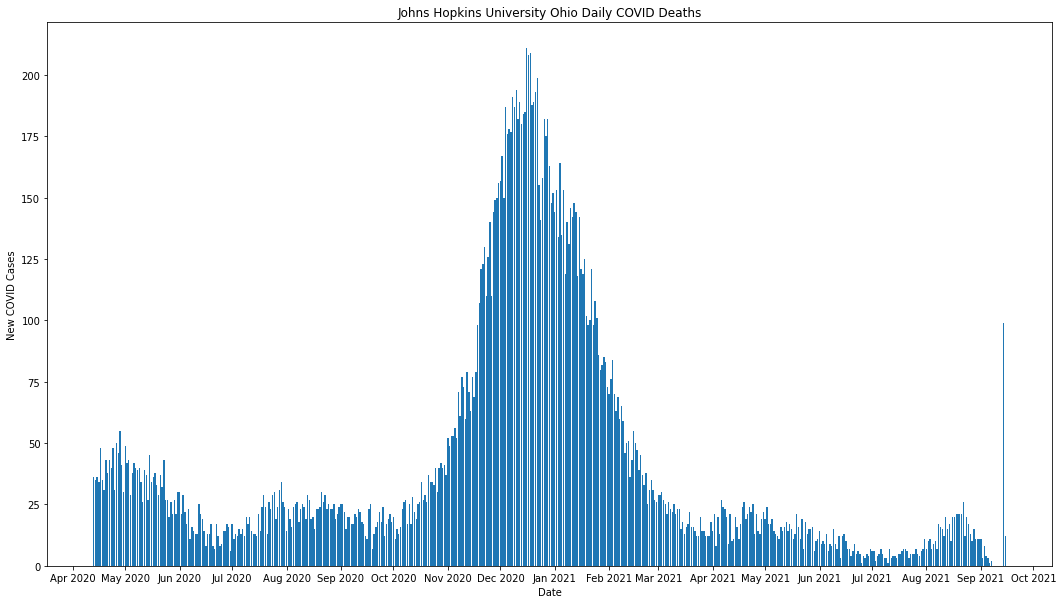

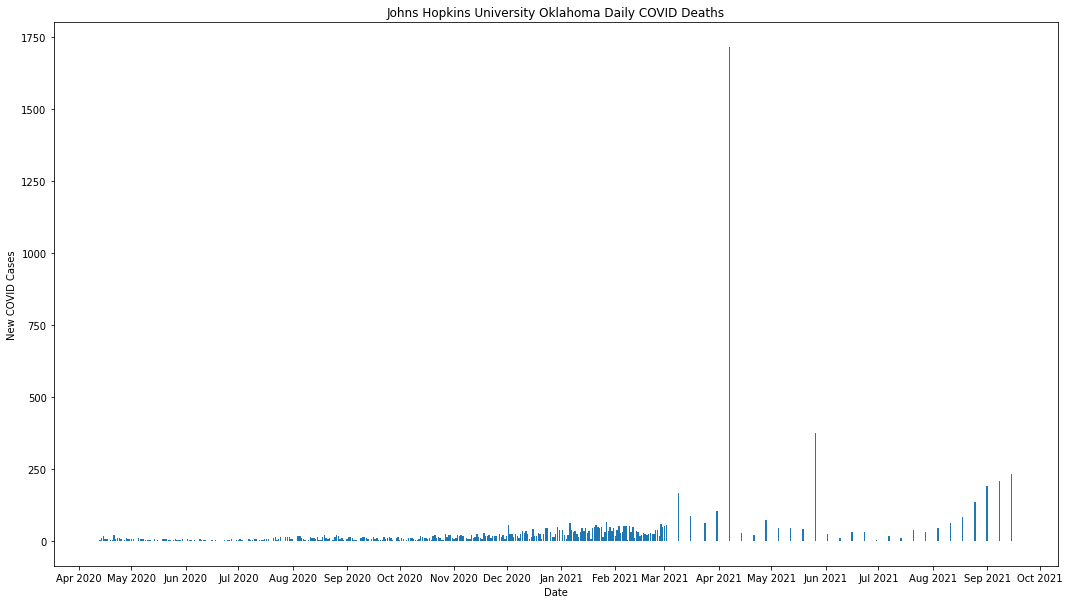

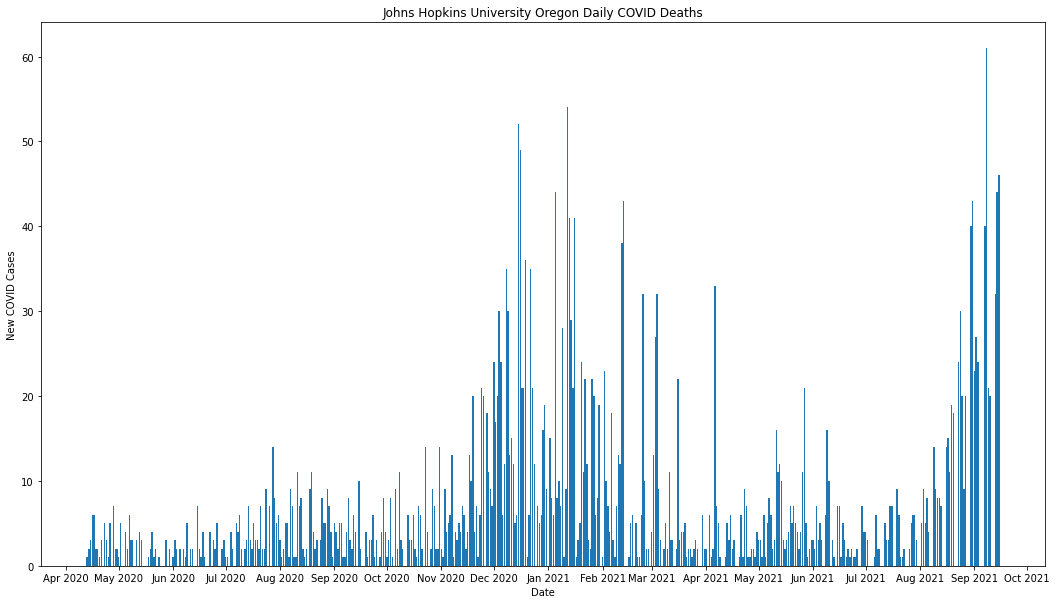

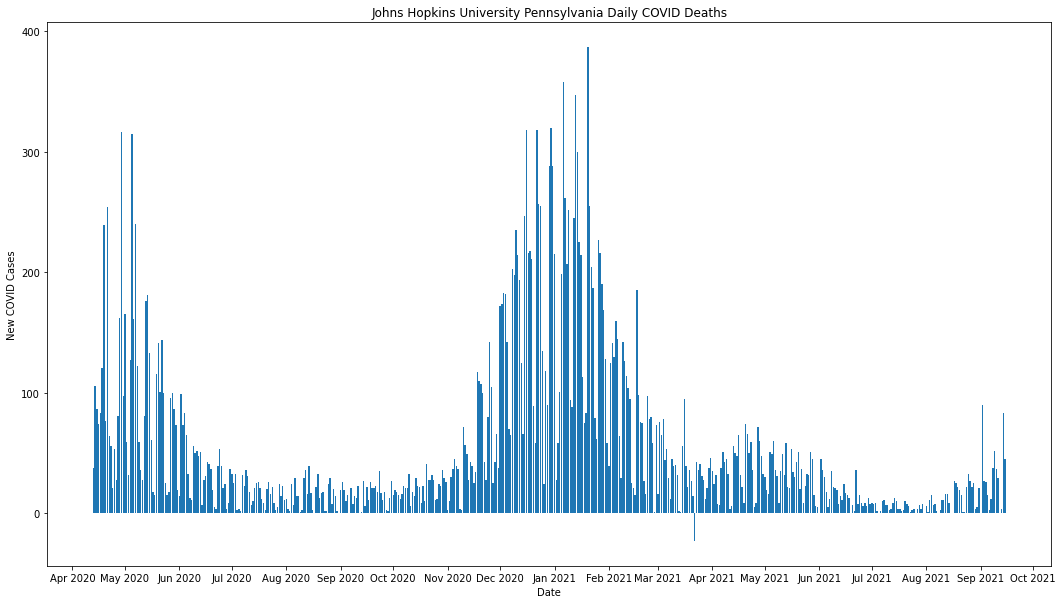

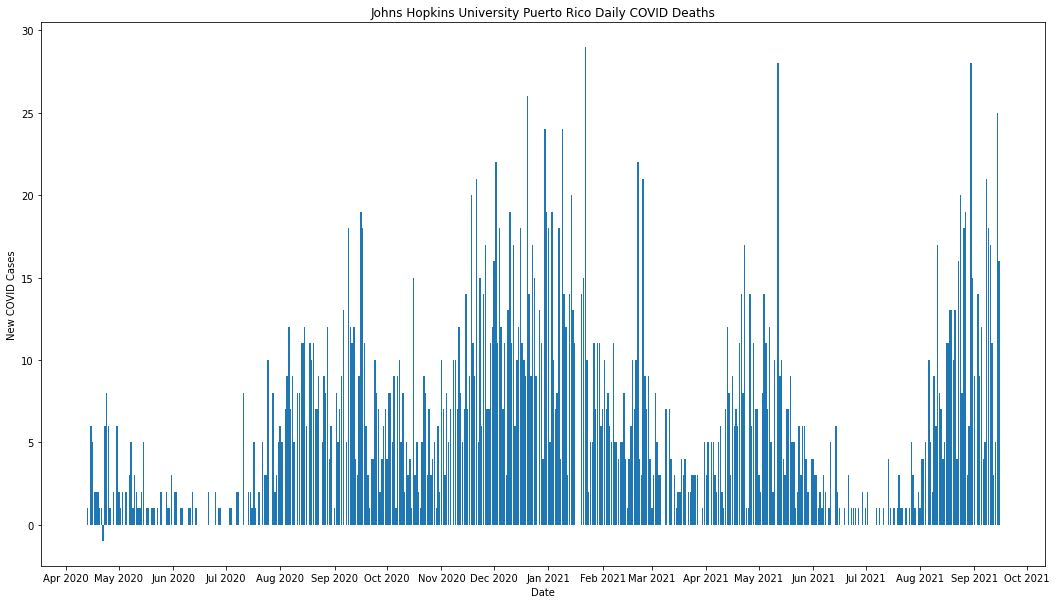

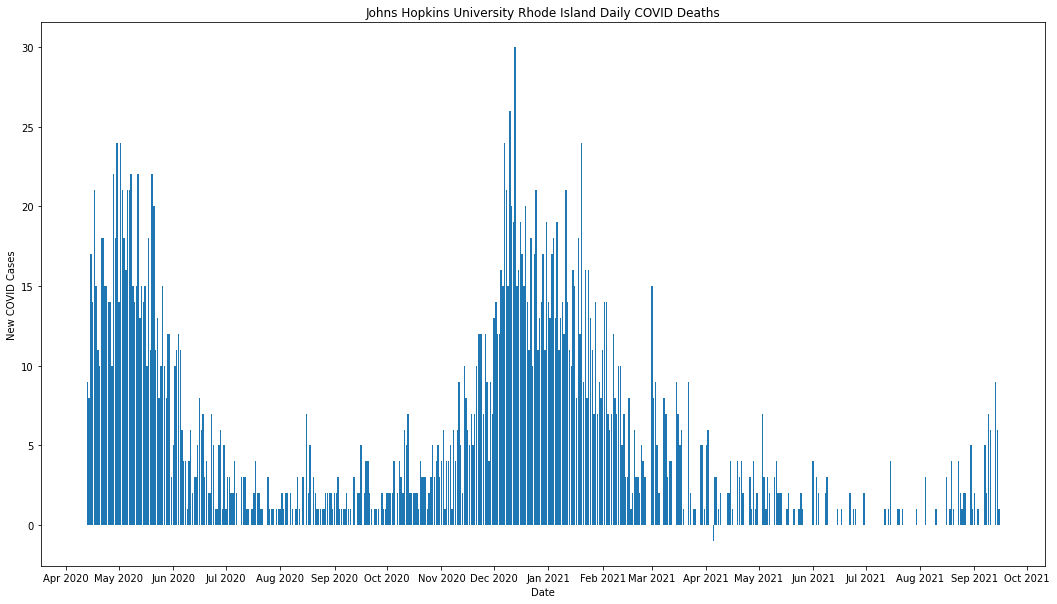

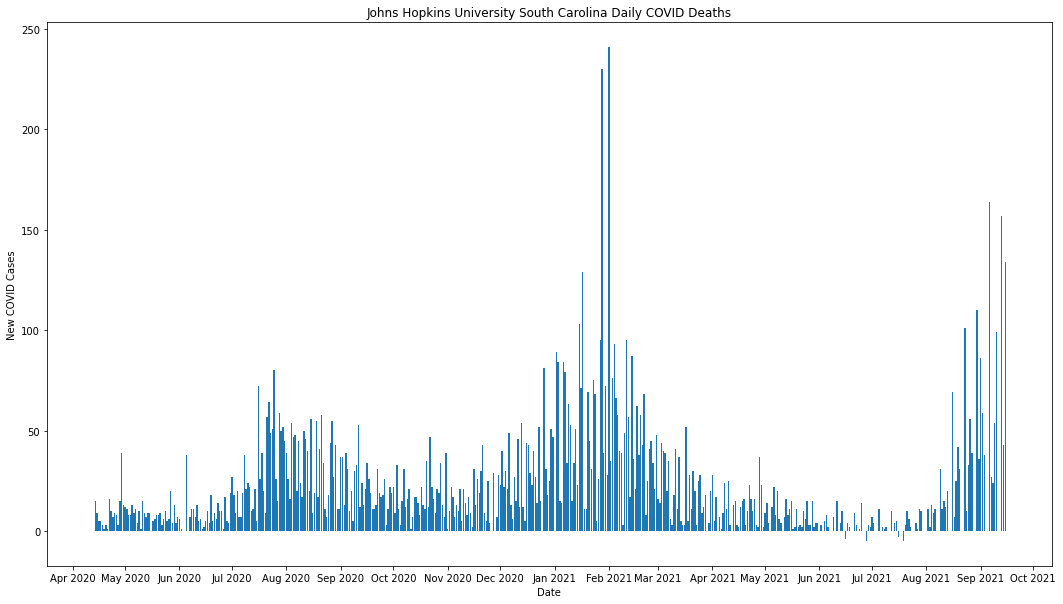

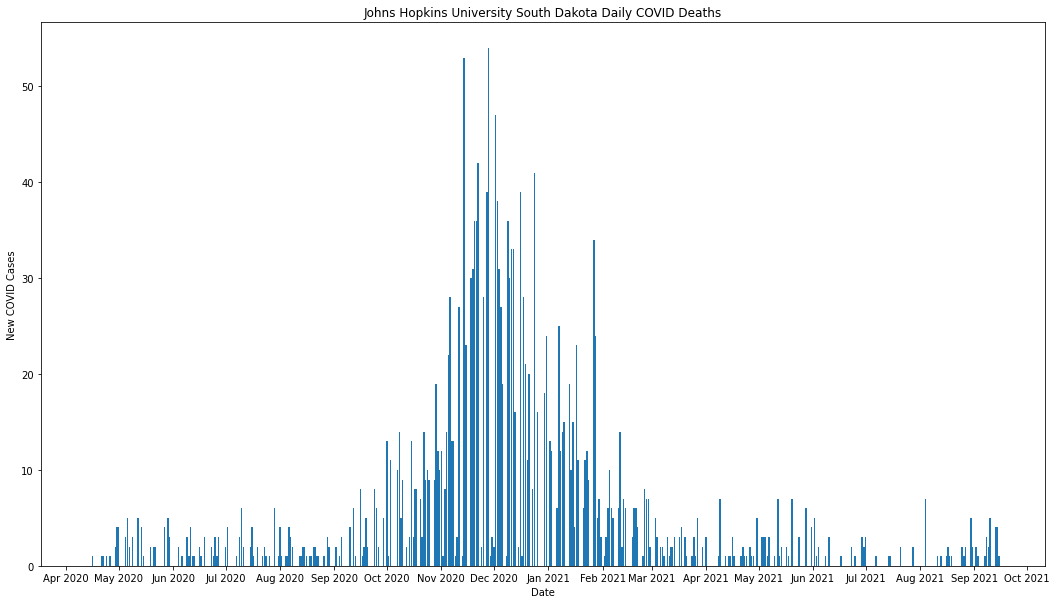

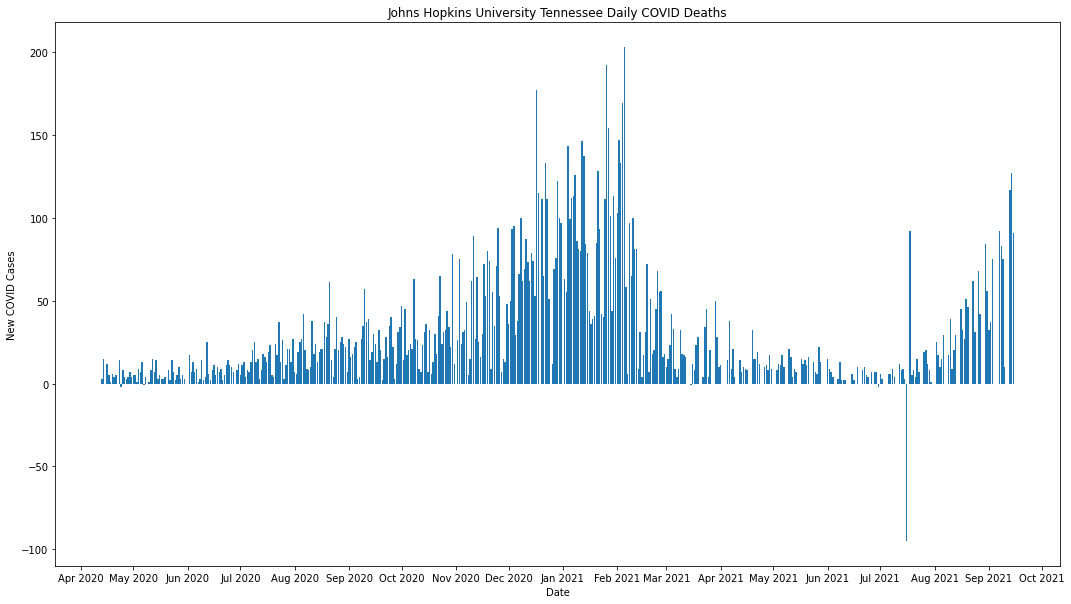

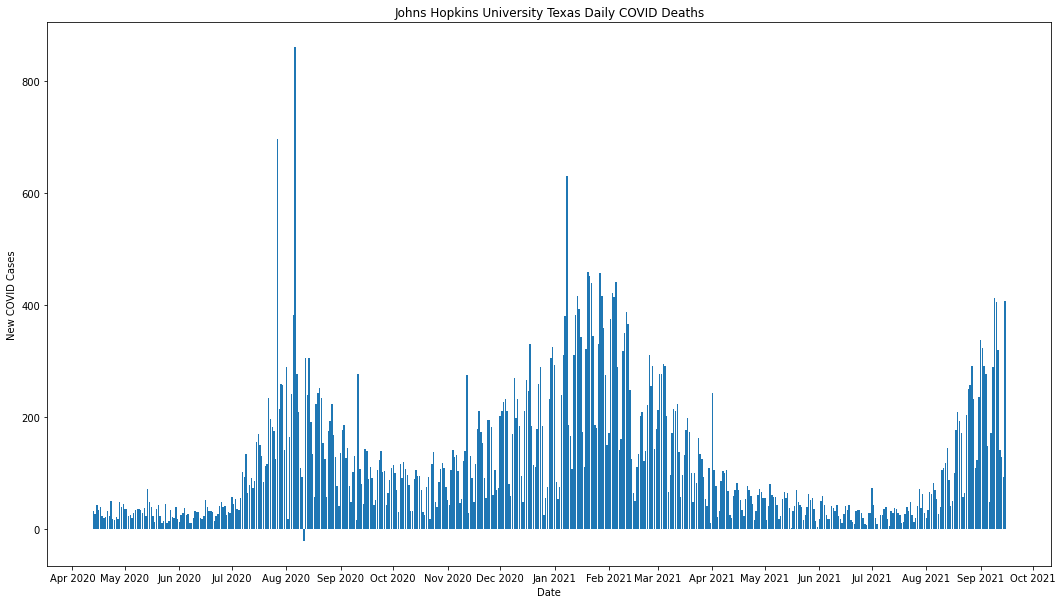

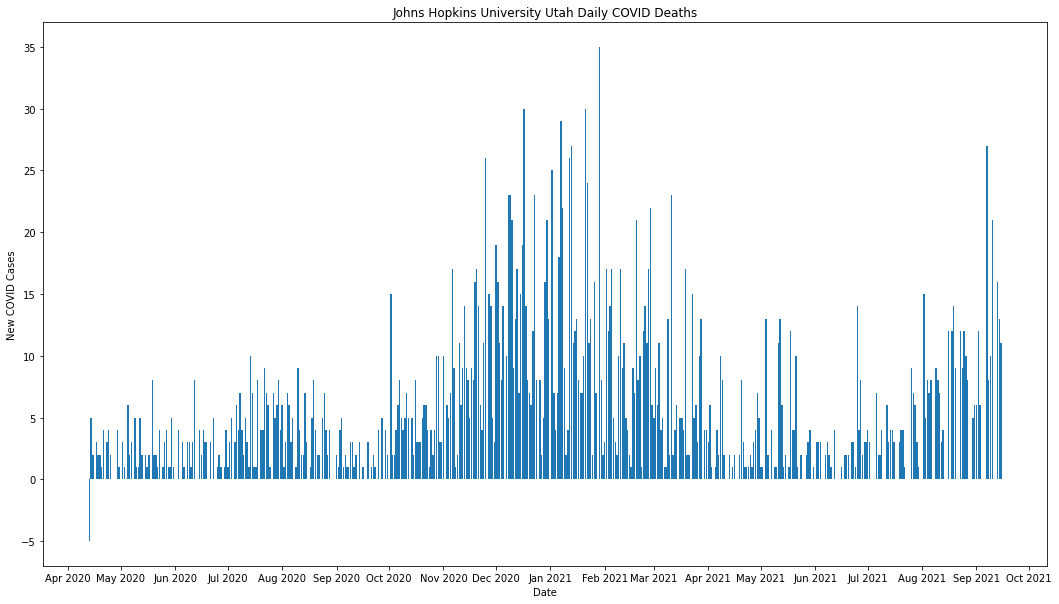

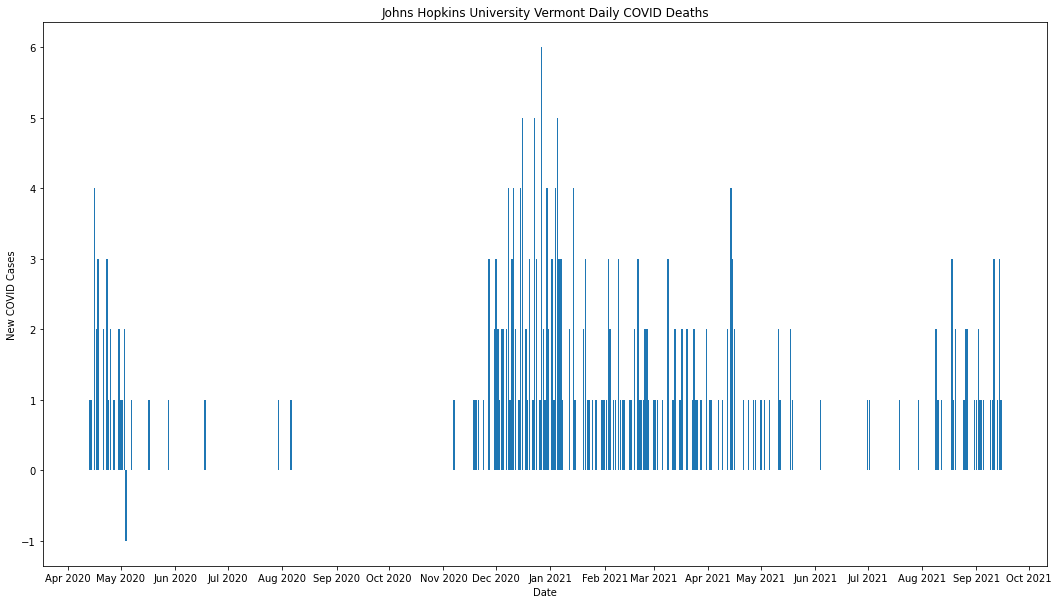

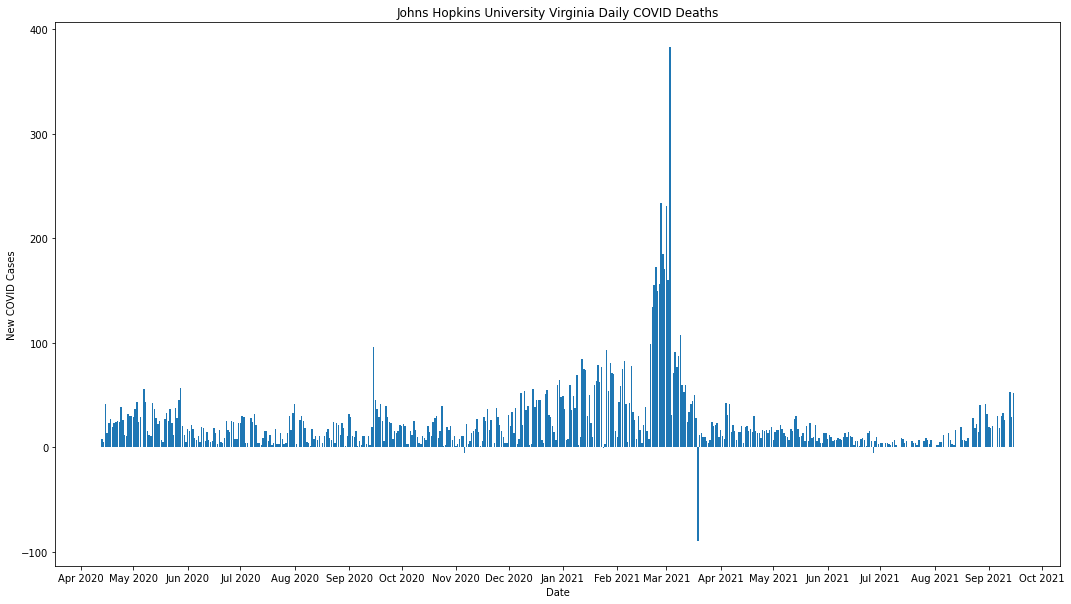

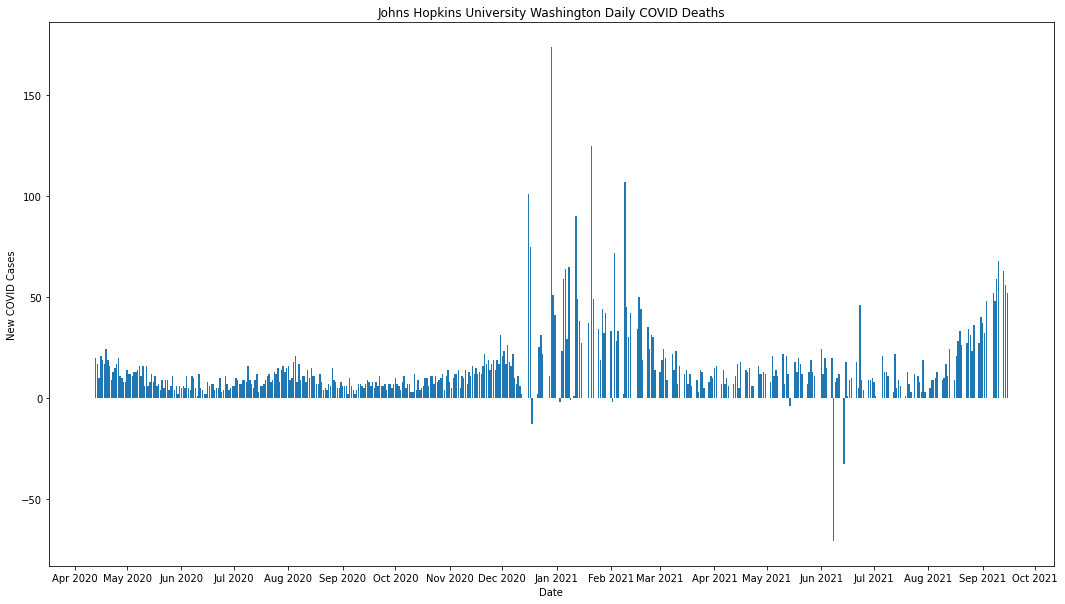

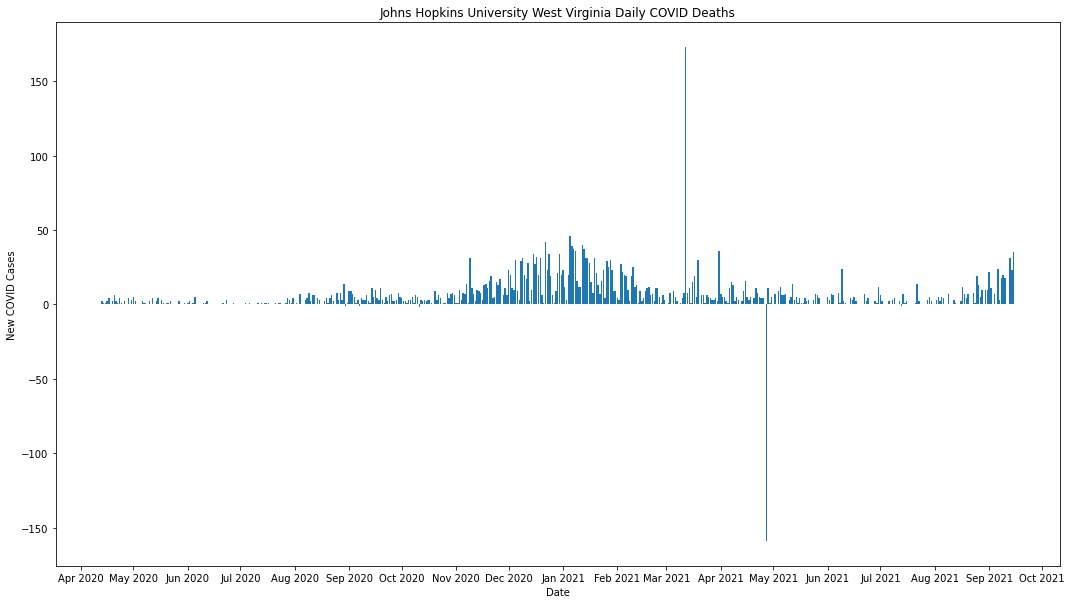

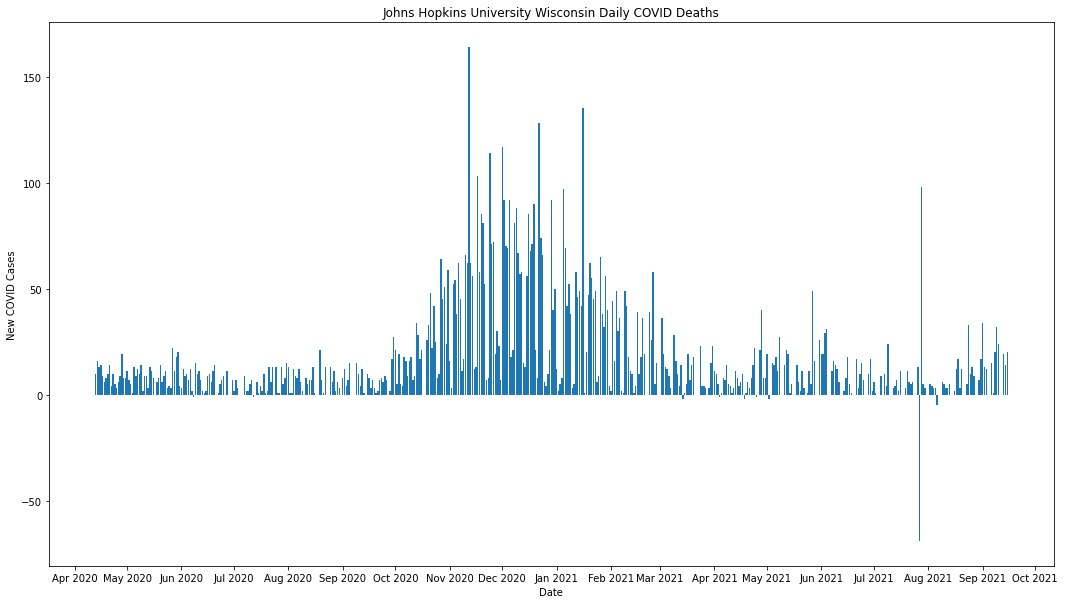

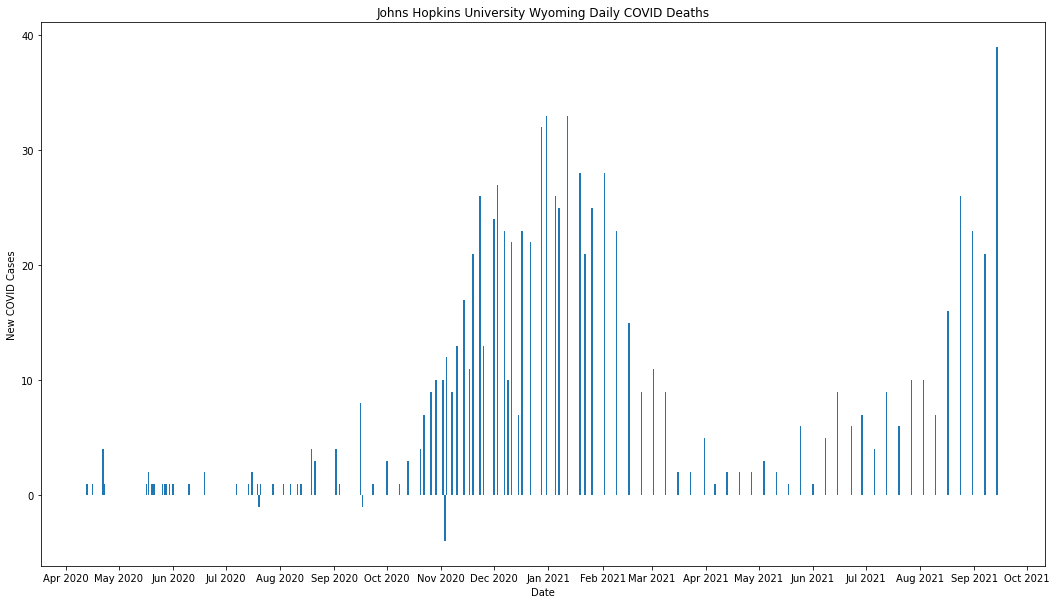

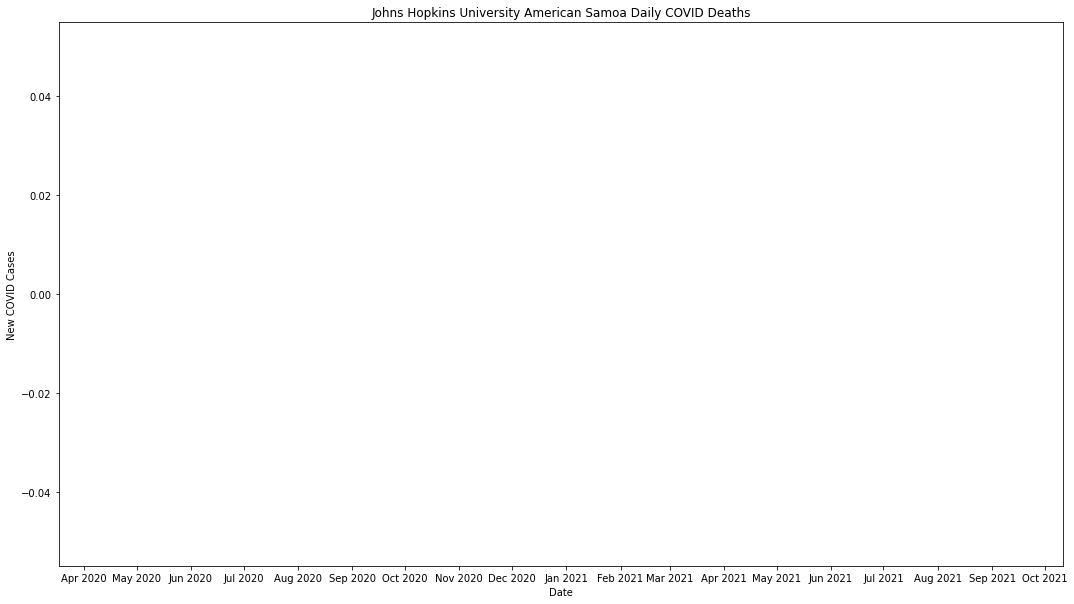

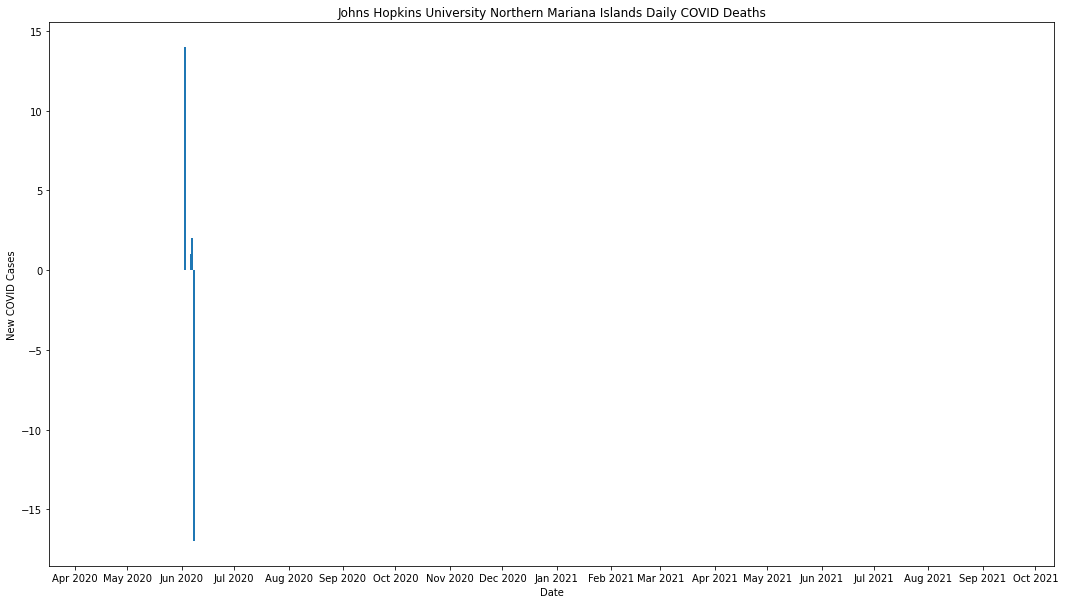

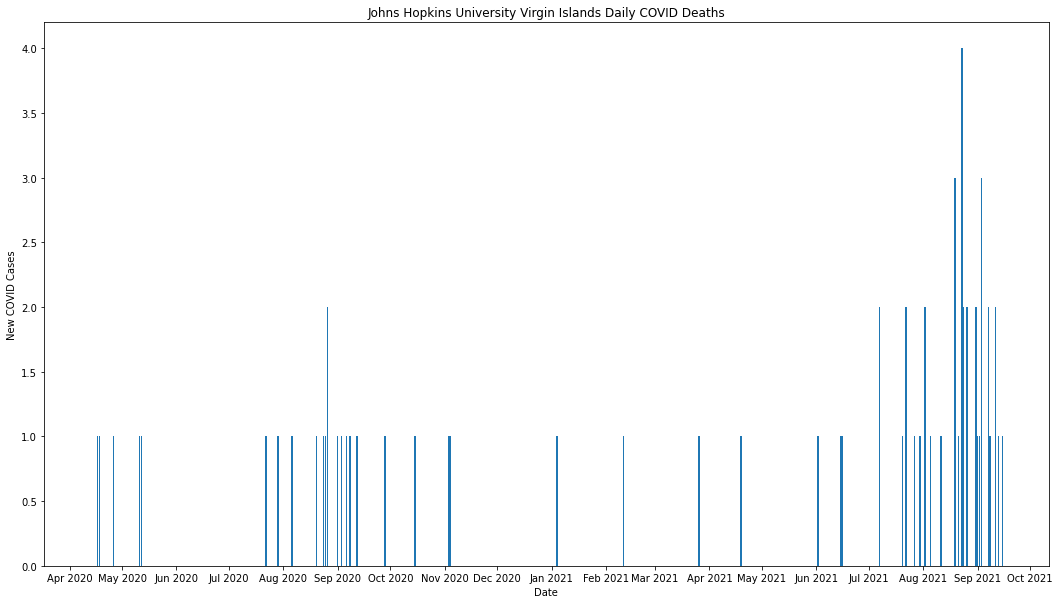

In [12]:
for x in State_list:
    return_deaths = process_state_deaths(x)
    chart_daily_deaths(return_deaths[0],return_deaths[1])